In [94]:
!pip install prophet


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [96]:
# Imported Fact Order dataset
factOrder_df = pd.read_csv('FactOrder.csv')


# Find number of rows and columns of the dataset
print(factOrder_df.shape)

(1399850, 16)


In [97]:
factOrder_df

OrderNumber  OrderRowNumber  ArticleKey    ArticleName      Colour  \
0           94444500               1       31182  Artikel 31182         NaN   
1           94543600               2       47942  Artikel 47942         red   
2           94543600               3        6763   Artikel 6763  light grey   
3           94543700               1       20870  Artikel 20870    offwhite   
4           94543700               2       38070  Artikel 38070  light grey   
...              ...             ...         ...            ...         ...   
1399845    116135100               3       56158  Artikel 56158        Blue   
1399846    116135100               4       33839  Artikel 33839        Blue   
1399847    116135100               5       54492  Artikel 54492    Offwhite   
1399848    116135100               6       35487  Artikel 35487    Offwhite   
1399849    116135100               7       12249  Artikel 12249        Blue   

             ArticleGenre     Size ArticleGroupName Collection   SizeGroup  \
0                  Övrigt      NaN              VAT       Base         NaN   
1        DRESSES LS WOVEN  116/122          DRESSES       Main  6[116-122]   
2             SWEATSHIRTS    92/98             TOPS       Main    4[92-98]   
3                 TEES LS    80/86             TOPS       Main    3[80-86]   
4             SWEATSHIRTS    80/86             TOPS       Main    3[80-86]   
...                   ...      ...              ...        ...         ...   
1399845           TEES LS  104/110             TOPS       Main  5[104-110]   
1399846   TROUSERS JERSEY    92/98          BOTTOMS       Main    4[92-98]   
1399847          LEGGINGS    92/98          BOTTOMS        Pre    4[92-98]   
1399848           TEES SS  104/110             TOPS        Pre  5[104-110]   
1399849    TROUSERS WOVEN  104/110          BOTTOMS        Pre  5[104-110]   

        BabyJunior ArticleMaterial  DateOrderedKey  QuantityOrdered  Amount  \
0              NaN             NaN        20180102              1.0  997.83   
1           3 KIDS             NaN        20180103              1.0  375.69   
2        2 TODDLER             NaN        20180103              1.0  178.75   
3        2 TODDLER             NaN        20180103              1.0  187.53   
4        2 TODDLER             NaN        20180103              1.0  178.75   
...            ...             ...             ...              ...     ...   
1399845     3 KIDS          JERSEY        20201223              1.0   99.04   
1399846  2 TODDLER          JERSEY        20201223              1.0   99.04   
1399847  2 TODDLER          JERSEY        20201223              1.0  104.54   
1399848     3 KIDS          JERSEY        20201223              1.0   99.04   
1399849     3 KIDS           DENIM        20201223              1.0  198.08   

          Cost  
0         0.00  
1        70.67  
2        68.44  
3        25.67  
4        68.44  
...        ...  
1399845  47.75  
1399846  46.61  
1399847  47.58  
1399848  45.55  
1399849  92.28  

[1399850 rows x 16 columns]

In [98]:
# Get column datatypes and check for null values
factOrder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399850 entries, 0 to 1399849
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   OrderNumber       1399850 non-null  int64  
 1   OrderRowNumber    1399850 non-null  int64  
 2   ArticleKey        1399850 non-null  int64  
 3   ArticleName       1399850 non-null  object 
 4   Colour            1385814 non-null  object 
 5   ArticleGenre      1399705 non-null  object 
 6   Size              1385789 non-null  object 
 7   ArticleGroupName  1399850 non-null  object 
 8   Collection        1399705 non-null  object 
 9   SizeGroup         1379516 non-null  object 
 10  BabyJunior        1379516 non-null  object 
 11  ArticleMaterial   1140321 non-null  object 
 12  DateOrderedKey    1399850 non-null  int64  
 13  QuantityOrdered   1399850 non-null  float64
 14  Amount            1399850 non-null  float64
 15  Cost              1399850 non-null  float64
dtype

In [99]:
# Check for null values
factOrder_df.isnull().sum()

OrderNumber              0
OrderRowNumber           0
ArticleKey               0
ArticleName              0
Colour               14036
ArticleGenre           145
Size                 14061
ArticleGroupName         0
Collection             145
SizeGroup            20334
BabyJunior           20334
ArticleMaterial     259529
DateOrderedKey           0
QuantityOrdered          0
Amount                   0
Cost                     0
dtype: int64

In [100]:
# Check for duplicates
factOrder_df_dup = factOrder_df[factOrder_df.duplicated(keep='first')]
factOrder_df_dup

Empty DataFrame
Columns: [OrderNumber, OrderRowNumber, ArticleKey, ArticleName, Colour, ArticleGenre, Size, ArticleGroupName, Collection, SizeGroup, BabyJunior, ArticleMaterial, DateOrderedKey, QuantityOrdered, Amount, Cost]
Index: []

In [101]:
factOrder_df.describe()

OrderNumber  OrderRowNumber    ArticleKey  DateOrderedKey  \
count  1.399850e+06    1.399850e+06  1.399850e+06    1.399850e+06   
mean   1.040100e+08    6.669433e+01  2.900643e+04    2.019142e+07   
std    6.179538e+06    1.246381e+02  1.653483e+04    8.317560e+03   
min    9.444450e+07    1.000000e+00 -1.000000e+00    2.018010e+07   
25%    9.801720e+07    2.000000e+00  1.472000e+04    2.018083e+07   
50%    1.040609e+08    1.100000e+01  2.946900e+04    2.019071e+07   
75%    1.091994e+08    7.800000e+01  4.337800e+04    2.020042e+07   
max    1.161351e+08    7.333000e+03  5.729700e+04    2.021010e+07   

       QuantityOrdered        Amount          Cost  
count     1.399850e+06  1.399850e+06  1.399850e+06  
mean      8.941265e+00  4.112368e+02  2.426276e+02  
std       7.283818e+02  5.487492e+03  2.169118e+03  
min      -3.000000e+00 -1.075200e+03 -2.538820e+03  
25%       1.000000e+00  1.115500e+02  4.885000e+01  
50%       1.000000e+00  2.060800e+02  7.872000e+01  
75%       2.000000e+00  3.579500e+02  1.517300e+02  
max       9.710100e+04  3.854246e+06  2.147798e+06

In [102]:
train_end_year = '2019'
article_dimension = 'ArticleGenre' # 'ArticleGenre' 'ArticleGroupName' 'ArticleKey' 'Colour' 'BabyJunior' 'ArticleMaterial' 'Size'

#factOrder_df = factOrder_df[(factOrder_df['QuantityOrdered'] >= 0) & (factOrder_df['QuantityOrdered'] <= 100)]
#factOrder_df = factOrder_df[factOrder_df['QuantityOrdered'] <= 50]
#factOrder_df['QuantityOrdered'] = factOrder_df['QuantityOrdered'] / abs(factOrder_df['QuantityOrdered'])

In [103]:
factOrder_df['DateOrderedKey'] = factOrder_df['DateOrderedKey'].astype(str)
#factOrder_df['DateOrderedMonth'] = pd.to_datetime(factOrder_df['DateOrderedKey'])
#factOrder_df['DateOrderedMonth'] = factOrder_df['DateOrderedMonth'].dt.strftime('%m-%Y')

#factOrder_df = factOrder_df.drop('DateOrderedKey', axis=1)
factOrder_df

OrderNumber  OrderRowNumber  ArticleKey    ArticleName      Colour  \
0           94444500               1       31182  Artikel 31182         NaN   
1           94543600               2       47942  Artikel 47942         red   
2           94543600               3        6763   Artikel 6763  light grey   
3           94543700               1       20870  Artikel 20870    offwhite   
4           94543700               2       38070  Artikel 38070  light grey   
...              ...             ...         ...            ...         ...   
1399845    116135100               3       56158  Artikel 56158        Blue   
1399846    116135100               4       33839  Artikel 33839        Blue   
1399847    116135100               5       54492  Artikel 54492    Offwhite   
1399848    116135100               6       35487  Artikel 35487    Offwhite   
1399849    116135100               7       12249  Artikel 12249        Blue   

             ArticleGenre     Size ArticleGroupName Collection   SizeGroup  \
0                  Övrigt      NaN              VAT       Base         NaN   
1        DRESSES LS WOVEN  116/122          DRESSES       Main  6[116-122]   
2             SWEATSHIRTS    92/98             TOPS       Main    4[92-98]   
3                 TEES LS    80/86             TOPS       Main    3[80-86]   
4             SWEATSHIRTS    80/86             TOPS       Main    3[80-86]   
...                   ...      ...              ...        ...         ...   
1399845           TEES LS  104/110             TOPS       Main  5[104-110]   
1399846   TROUSERS JERSEY    92/98          BOTTOMS       Main    4[92-98]   
1399847          LEGGINGS    92/98          BOTTOMS        Pre    4[92-98]   
1399848           TEES SS  104/110             TOPS        Pre  5[104-110]   
1399849    TROUSERS WOVEN  104/110          BOTTOMS        Pre  5[104-110]   

        BabyJunior ArticleMaterial DateOrderedKey  QuantityOrdered  Amount  \
0              NaN             NaN       20180102              1.0  997.83   
1           3 KIDS             NaN       20180103              1.0  375.69   
2        2 TODDLER             NaN       20180103              1.0  178.75   
3        2 TODDLER             NaN       20180103              1.0  187.53   
4        2 TODDLER             NaN       20180103              1.0  178.75   
...            ...             ...            ...              ...     ...   
1399845     3 KIDS          JERSEY       20201223              1.0   99.04   
1399846  2 TODDLER          JERSEY       20201223              1.0   99.04   
1399847  2 TODDLER          JERSEY       20201223              1.0  104.54   
1399848     3 KIDS          JERSEY       20201223              1.0   99.04   
1399849     3 KIDS           DENIM       20201223              1.0  198.08   

          Cost  
0         0.00  
1        70.67  
2        68.44  
3        25.67  
4        68.44  
...        ...  
1399845  47.75  
1399846  46.61  
1399847  47.58  
1399848  45.55  
1399849  92.28  

[1399850 rows x 16 columns]

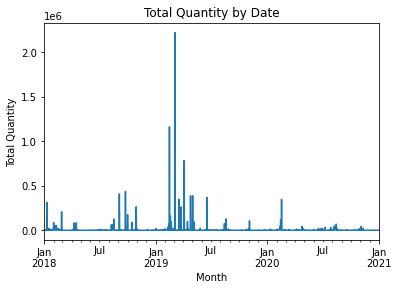

In [104]:
factOrder_df.DateOrderedKey =  pd.to_datetime(factOrder_df['DateOrderedKey'], format= '%Y-%m-%d')

total_by_date = factOrder_df.groupby(pd.to_datetime(factOrder_df['DateOrderedKey'], format= '%Y-%m'))['QuantityOrdered'].sum().fillna(0)
total_by_date.plot()
plt.title('Total Quantity by Date')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.show()

# Preprocessing the dataset

In [105]:
article_dimension_df = pd.DataFrame(factOrder_df[article_dimension].dropna().unique(), columns=[article_dimension])
article_dimension_df

ArticleGenre
0             Övrigt
1   DRESSES LS WOVEN
2        SWEATSHIRTS
3            TEES LS
4            TEES SS
..               ...
79           Jackets
80         Postcards
81             Party
82             Shoes
83    JUMPSUIT WOVEN

[84 rows x 1 columns]

In [106]:
#factOrder_df = factOrder_df.groupby(['DateOrderedKey']).sum('QuantityOrdered').fillna(0)
factOrder_df = factOrder_df.groupby(['DateOrderedKey', article_dimension]).sum('QuantityOrdered').fillna(0)
factOrder_df = factOrder_df.reset_index()
factOrder_df = factOrder_df[['DateOrderedKey', 'QuantityOrdered', article_dimension]]

factOrder_df

DateOrderedKey  QuantityOrdered       ArticleGenre
0         2018-01-01             29.0            BEANIES
1         2018-01-01              2.0           BEDDINGS
2         2018-01-01              8.0            BODY LS
3         2018-01-01              2.0            BODY SS
4         2018-01-01              1.0          BODY WRAP
...              ...              ...                ...
48444     2021-01-01              3.0  TROUSERS UNPADDED
48445     2021-01-01              1.0       TROUSERS WCT
48446     2021-01-01              3.0     TROUSERS WOVEN
48447     2021-01-01              3.0          UNDERWEAR
48448     2021-01-01              1.0            UV TOPS

[48449 rows x 3 columns]

In [107]:
# Creating the common function for splitting the dataset into test and train samples
def CreateSplitTestAndTrainData(df_model):
    # Splitting the dataset into training and test    
    train = df_model[pd.to_datetime(df_model['ds']).dt.strftime('%Y') <= train_end_year]
    test = df_model[pd.to_datetime(df_model['ds']).dt.strftime('%Y') > train_end_year]
        
    return train, test

In [108]:
def CreateModel(train):
    
    model = Prophet(weekly_seasonality=False)
    #model = Prophet()
    
    # Enable monthly seasonality
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
       
    # Fitting the model with the training dataset
    model.fit(train)
    
    return model

In [109]:
def ModelPrediction(model):
    # Create future dates for prediction
    future_dates = model.make_future_dataframe(periods=12, freq='MS')
  #  future_dates = model.make_future_dataframe(periods=365, freq='D')

    # Make predictions for future dates
    predictions = model.predict(future_dates)

    # Plot the prediction
    model.plot(predictions);
    #print(predictions)
    
    return predictions
    
    # Plot the prediction components
   # model.plot_components(predictions);

13:15:39 - cmdstanpy - INFO - Chain [1] start processing


Övrigt


13:15:39 - cmdstanpy - INFO - Chain [1] done processing
13:15:40 - cmdstanpy - INFO - Chain [1] start processing


DRESSES LS WOVEN


13:15:40 - cmdstanpy - INFO - Chain [1] done processing
13:15:40 - cmdstanpy - INFO - Chain [1] start processing


SWEATSHIRTS


13:15:40 - cmdstanpy - INFO - Chain [1] done processing


TEES LS


13:15:41 - cmdstanpy - INFO - Chain [1] start processing
13:15:41 - cmdstanpy - INFO - Chain [1] done processing
13:15:42 - cmdstanpy - INFO - Chain [1] start processing


TEES SS


13:15:42 - cmdstanpy - INFO - Chain [1] done processing
13:15:42 - cmdstanpy - INFO - Chain [1] start processing


DRESSES LS


13:15:42 - cmdstanpy - INFO - Chain [1] done processing
13:15:43 - cmdstanpy - INFO - Chain [1] start processing


LEGGINGS


13:15:43 - cmdstanpy - INFO - Chain [1] done processing
13:15:44 - cmdstanpy - INFO - Chain [1] start processing


DRESSES SS


13:15:44 - cmdstanpy - INFO - Chain [1] done processing
13:15:44 - cmdstanpy - INFO - Chain [1] start processing


BEANIES


13:15:44 - cmdstanpy - INFO - Chain [1] done processing
13:15:45 - cmdstanpy - INFO - Chain [1] start processing


JACKETS UNPADDED


13:15:45 - cmdstanpy - INFO - Chain [1] done processing
13:15:45 - cmdstanpy - INFO - Chain [1] start processing


LEGGINGS NB


13:15:45 - cmdstanpy - INFO - Chain [1] done processing
13:15:46 - cmdstanpy - INFO - Chain [1] start processing
13:15:46 - cmdstanpy - INFO - Chain [1] done processing


SKIRTS


13:15:46 - cmdstanpy - INFO - Chain [1] start processing
13:15:46 - cmdstanpy - INFO - Chain [1] done processing


Dungaree


13:15:47 - cmdstanpy - INFO - Chain [1] start processing


ONESIES


13:15:47 - cmdstanpy - INFO - Chain [1] done processing
13:15:47 - cmdstanpy - INFO - Chain [1] start processing


CAPS


13:15:48 - cmdstanpy - INFO - Chain [1] done processing
13:15:48 - cmdstanpy - INFO - Chain [1] start processing


BODY LS


13:15:48 - cmdstanpy - INFO - Chain [1] done processing
13:15:49 - cmdstanpy - INFO - Chain [1] start processing


SHIRT/BLOUSE


13:15:49 - cmdstanpy - INFO - Chain [1] done processing
13:15:49 - cmdstanpy - INFO - Chain [1] start processing
13:15:49 - cmdstanpy - INFO - Chain [1] done processing


TROUSERS JERSEY


13:15:50 - cmdstanpy - INFO - Chain [1] start processing


SWEATPANTS


13:15:50 - cmdstanpy - INFO - Chain [1] done processing
13:15:50 - cmdstanpy - INFO - Chain [1] start processing


Jumpsuits Baby


13:15:51 - cmdstanpy - INFO - Chain [1] done processing
13:15:51 - cmdstanpy - INFO - Chain [1] start processing
13:15:51 - cmdstanpy - INFO - Chain [1] done processing


SWEATDRESSES


C:\Users\Sandeep\anaconda3\lib\site-packages\prophet\plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
13:15:51 - cmdstanpy - INFO - Chain [1] start processing


BODY WRAP


13:15:52 - cmdstanpy - INFO - Chain [1] done processing
13:15:52 - cmdstanpy - INFO - Chain [1] start processing
13:15:52 - cmdstanpy - INFO - Chain [1] done processing


SWEATERS


13:15:52 - cmdstanpy - INFO - Chain [1] start processing
13:15:53 - cmdstanpy - INFO - Chain [1] done processing


OVERALLS UNPADDED


13:15:53 - cmdstanpy - INFO - Chain [1] start processing
13:15:53 - cmdstanpy - INFO - Chain [1] done processing


TIGHTS


13:15:54 - cmdstanpy - INFO - Chain [1] start processing


BODY SS


13:15:54 - cmdstanpy - INFO - Chain [1] done processing
13:15:54 - cmdstanpy - INFO - Chain [1] start processing


JACKETS PADDED


13:15:54 - cmdstanpy - INFO - Chain [1] done processing
13:15:55 - cmdstanpy - INFO - Chain [1] start processing
13:15:55 - cmdstanpy - INFO - Chain [1] done processing


SKIRTS WOVEN


13:15:55 - cmdstanpy - INFO - Chain [1] start processing


BAGS


13:15:55 - cmdstanpy - INFO - Chain [1] done processing
13:15:56 - cmdstanpy - INFO - Chain [1] start processing


SOCKS


13:15:56 - cmdstanpy - INFO - Chain [1] done processing
13:15:56 - cmdstanpy - INFO - Chain [1] start processing
13:15:56 - cmdstanpy - INFO - Chain [1] done processing


FLEECE


13:15:57 - cmdstanpy - INFO - Chain [1] start processing
13:15:57 - cmdstanpy - INFO - Chain [1] done processing


OTHER HOME


13:15:57 - cmdstanpy - INFO - Chain [1] start processing


SWIMSUITS


13:15:57 - cmdstanpy - INFO - Chain [1] done processing
13:15:58 - cmdstanpy - INFO - Chain [1] start processing


GLOVES


13:15:58 - cmdstanpy - INFO - Chain [1] done processing
13:15:58 - cmdstanpy - INFO - Chain [1] start processing


TROUSERS WOVEN


13:15:58 - cmdstanpy - INFO - Chain [1] done processing
13:15:59 - cmdstanpy - INFO - Chain [1] start processing


BEDDINGS


13:15:59 - cmdstanpy - INFO - Chain [1] done processing
13:15:59 - cmdstanpy - INFO - Chain [1] start processing


Giftbox


13:16:00 - cmdstanpy - INFO - Chain [1] done processing


CARDIGANS


13:16:00 - cmdstanpy - INFO - Chain [1] start processing
13:16:00 - cmdstanpy - INFO - Chain [1] done processing
13:16:01 - cmdstanpy - INFO - Chain [1] start processing


SUNGLASSES


13:16:01 - cmdstanpy - INFO - Chain [1] done processing
13:16:01 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] done processing


DRESSES STRAP


13:16:02 - cmdstanpy - INFO - Chain [1] start processing
13:16:02 - cmdstanpy - INFO - Chain [1] done processing


UV TOPS


13:16:02 - cmdstanpy - INFO - Chain [1] start processing
13:16:02 - cmdstanpy - INFO - Chain [1] done processing


JUMPSUITS


13:16:03 - cmdstanpy - INFO - Chain [1] start processing


SHORTS


13:16:03 - cmdstanpy - INFO - Chain [1] done processing
13:16:03 - cmdstanpy - INFO - Chain [1] start processing


TANKS


13:16:03 - cmdstanpy - INFO - Chain [1] done processing
13:16:04 - cmdstanpy - INFO - Chain [1] start processing


SWIMSHORTS


13:16:04 - cmdstanpy - INFO - Chain [1] done processing
13:16:04 - cmdstanpy - INFO - Chain [1] start processing
13:16:04 - cmdstanpy - INFO - Chain [1] done processing


RAIN & SUN HATS


13:16:05 - cmdstanpy - INFO - Chain [1] start processing
13:16:05 - cmdstanpy - INFO - Chain [1] done processing


SWIMPANTS


13:16:05 - cmdstanpy - INFO - Chain [1] start processing


OVERALLS PADDED


13:16:05 - cmdstanpy - INFO - Chain [1] done processing
13:16:06 - cmdstanpy - INFO - Chain [1] start processing


OTHER ACCESSORIES


13:16:06 - cmdstanpy - INFO - Chain [1] done processing
13:16:06 - cmdstanpy - INFO - Chain [1] start processing
13:16:07 - cmdstanpy - INFO - Chain [1] done processing


SHOES


13:16:07 - cmdstanpy - INFO - Chain [1] start processing
13:16:07 - cmdstanpy - INFO - Chain [1] done processing


TROUSERS PADDED


13:16:07 - cmdstanpy - INFO - Chain [1] start processing
13:16:08 - cmdstanpy - INFO - Chain [1] done processing


DRESSES SS WOVEN


13:16:08 - cmdstanpy - INFO - Chain [1] start processing
13:16:08 - cmdstanpy - INFO - Chain [1] done processing


SCARVES/BIBS


13:16:08 - cmdstanpy - INFO - Chain [1] start processing


BABY BOOTS


13:16:09 - cmdstanpy - INFO - Chain [1] done processing
13:16:09 - cmdstanpy - INFO - Chain [1] start processing


TROUSERS UNPADDED


13:16:09 - cmdstanpy - INFO - Chain [1] done processing
13:16:09 - cmdstanpy - INFO - Chain [1] start processing
13:16:09 - cmdstanpy - INFO - Chain [1] done processing


DENIM


13:16:10 - cmdstanpy - INFO - Chain [1] start processing
13:16:10 - cmdstanpy - INFO - Chain [1] done processing


Summersuit


13:16:10 - cmdstanpy - INFO - Chain [1] start processing
13:16:10 - cmdstanpy - INFO - Chain [1] done processing


UV SUITS


13:16:11 - cmdstanpy - INFO - Chain [1] start processing


BABY KIT


13:16:11 - cmdstanpy - INFO - Chain [1] done processing
13:16:11 - cmdstanpy - INFO - Chain [1] start processing
13:16:11 - cmdstanpy - INFO - Chain [1] done processing


BATH


13:16:12 - cmdstanpy - INFO - Chain [1] start processing


Jacket


13:16:13 - cmdstanpy - INFO - Chain [1] done processing
13:16:13 - cmdstanpy - INFO - Chain [1] start processing
13:16:13 - cmdstanpy - INFO - Chain [1] done processing


BODY WOVEN


13:16:14 - cmdstanpy - INFO - Chain [1] start processing


SHORTS WOVEN


13:16:14 - cmdstanpy - INFO - Chain [1] done processing
13:16:14 - cmdstanpy - INFO - Chain [1] start processing


PLAYSUIT


13:16:15 - cmdstanpy - INFO - Chain [1] done processing
13:16:15 - cmdstanpy - INFO - Chain [1] start processing


OUTERWEAR


13:16:16 - cmdstanpy - INFO - Chain [1] done processing
13:16:16 - cmdstanpy - INFO - Chain [1] start processing


INTERIOR


13:16:18 - cmdstanpy - INFO - Chain [1] done processing
13:16:18 - cmdstanpy - INFO - Chain [1] start processing
13:16:18 - cmdstanpy - INFO - Chain [1] done processing


ROBES


13:16:19 - cmdstanpy - INFO - Chain [1] start processing
13:16:19 - cmdstanpy - INFO - Chain [1] done processing


UNDERWEAR


13:16:19 - cmdstanpy - INFO - Chain [1] start processing
13:16:19 - cmdstanpy - INFO - Chain [1] done processing


TOP WCT


13:16:20 - cmdstanpy - INFO - Chain [1] start processing
13:16:20 - cmdstanpy - INFO - Chain [1] done processing


TROUSERS WCT


13:16:20 - cmdstanpy - INFO - Chain [1] start processing


TOP


13:16:27 - cmdstanpy - INFO - Chain [1] done processing
13:16:27 - cmdstanpy - INFO - Chain [1] start processing


OTH


13:16:27 - cmdstanpy - INFO - Chain [1] done processing
13:16:28 - cmdstanpy - INFO - Chain [1] start processing
13:16:28 - cmdstanpy - INFO - Chain [1] done processing


Caps


13:16:28 - cmdstanpy - INFO - Chain [1] start processing
13:16:28 - cmdstanpy - INFO - Chain [1] done processing


KNITTED HATS


13:16:28 - cmdstanpy - INFO - Chain [1] start processing
13:16:28 - cmdstanpy - INFO - Chain [1] done processing


BEANIE BABY


13:16:29 - cmdstanpy - INFO - Chain [1] start processing
13:16:29 - cmdstanpy - INFO - Chain [1] done processing


HOME


13:16:29 - cmdstanpy - INFO - Chain [1] start processing
13:16:29 - cmdstanpy - INFO - Chain [1] done processing


Paperbags store material


13:16:30 - cmdstanpy - INFO - Chain [1] start processing
13:16:30 - cmdstanpy - INFO - Chain [1] done processing


Tee


13:16:30 - cmdstanpy - INFO - Chain [1] start processing


BOV


13:16:32 - cmdstanpy - INFO - Chain [1] done processing


Jackets


13:16:36 - cmdstanpy - INFO - Chain [1] start processing
13:16:37 - cmdstanpy - INFO - Chain [1] done processing


Postcards


13:16:42 - cmdstanpy - INFO - Chain [1] start processing
13:16:44 - cmdstanpy - INFO - Chain [1] done processing


Party
Shoes
JUMPSUIT WOVEN


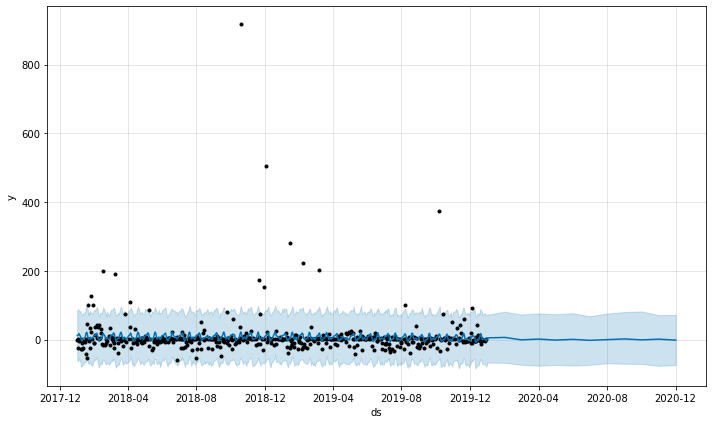

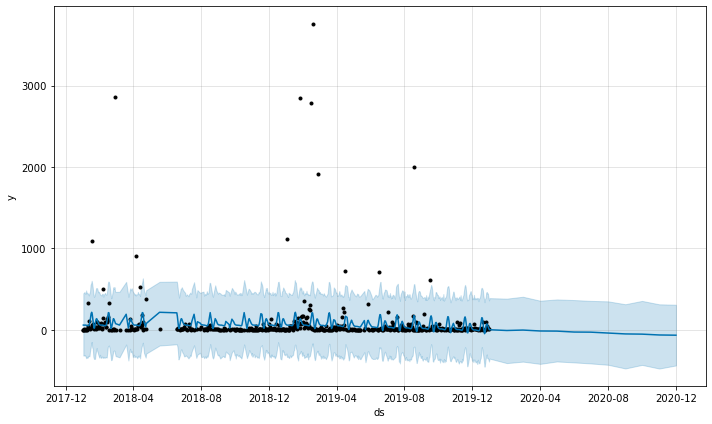

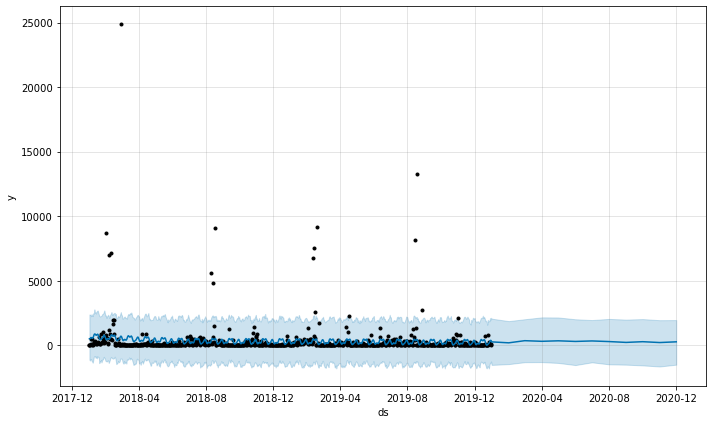

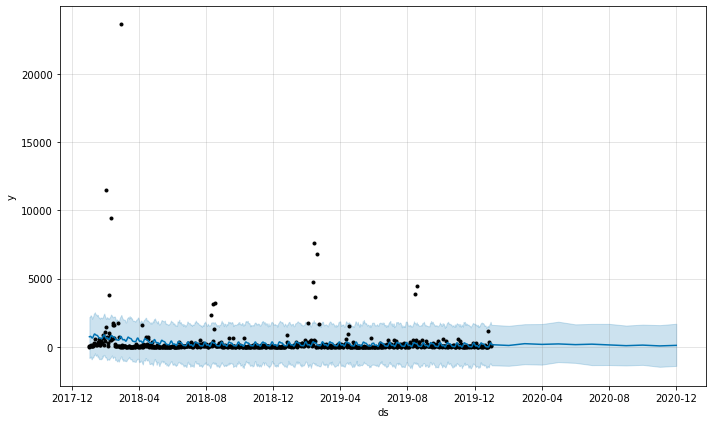

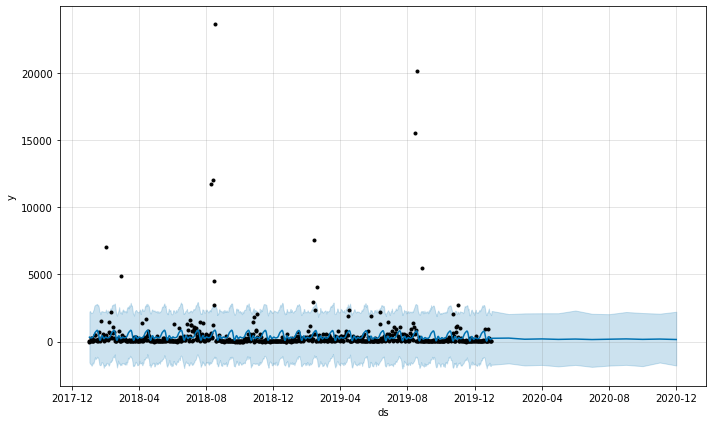

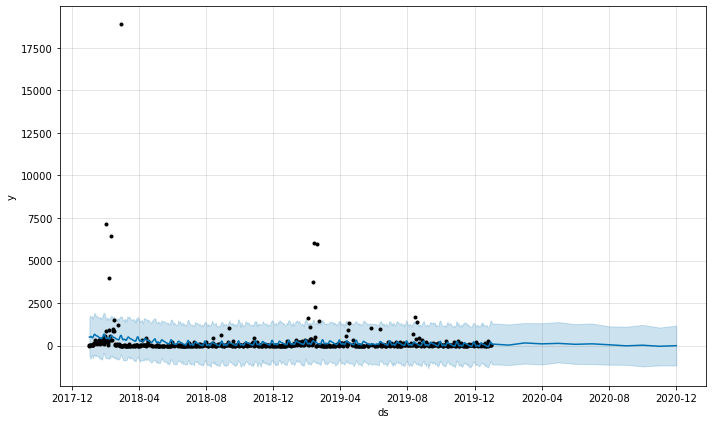

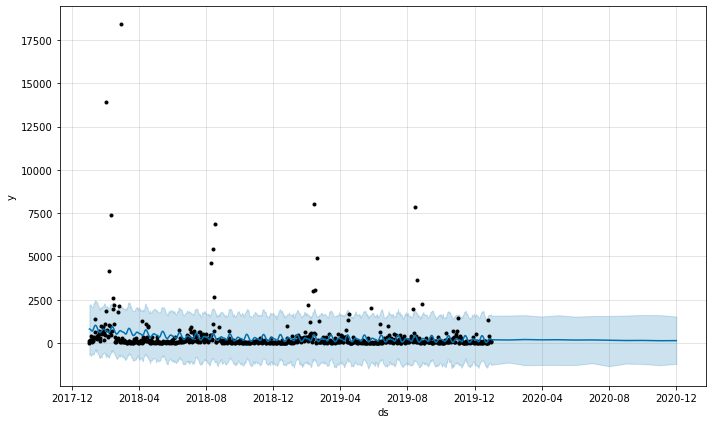

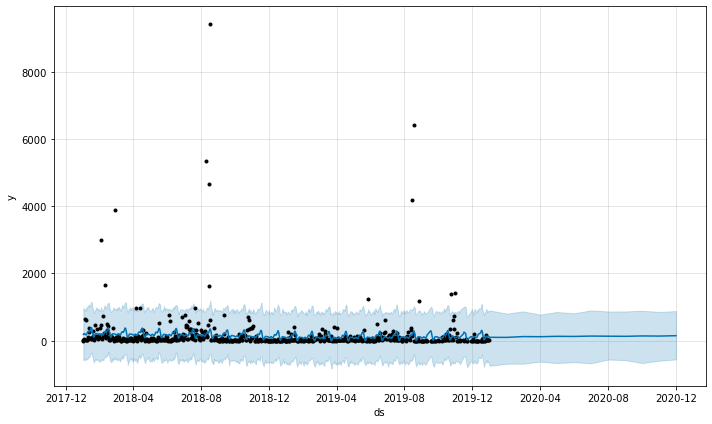

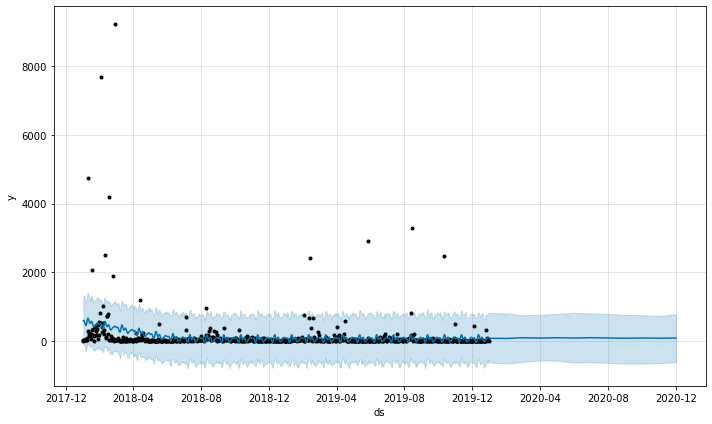

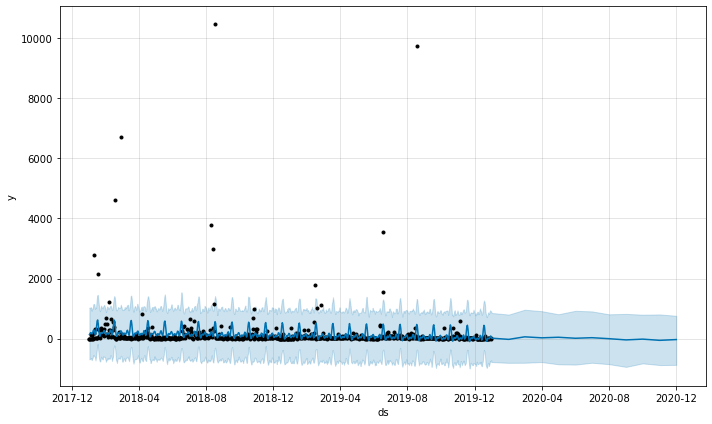

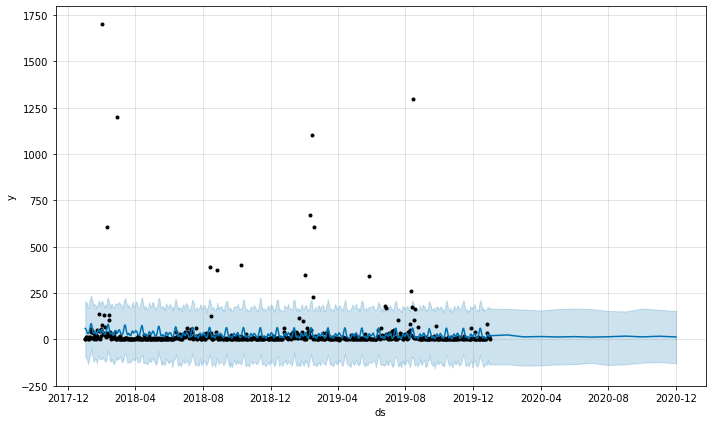

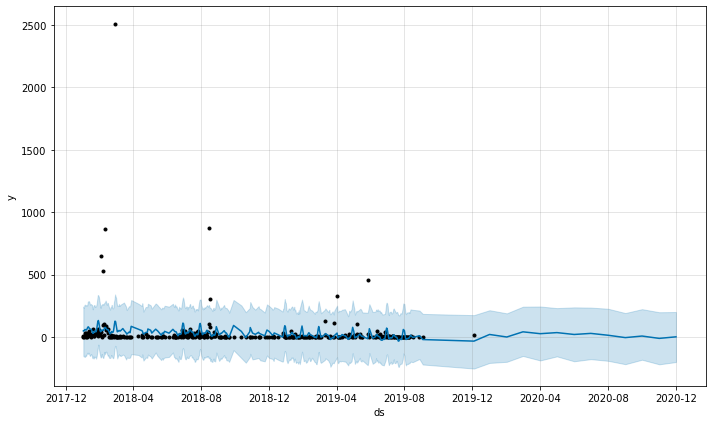

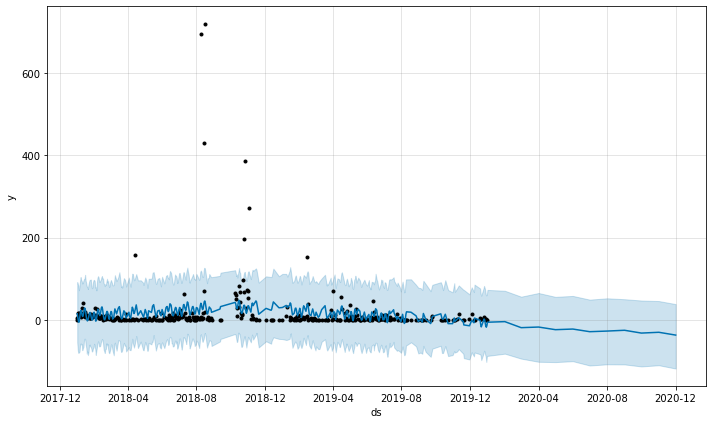

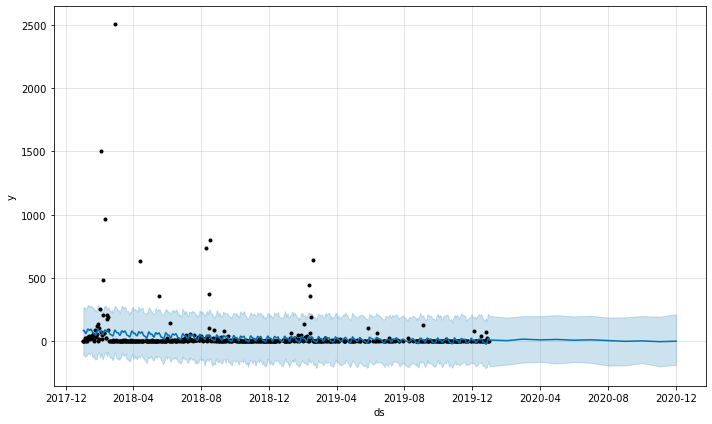

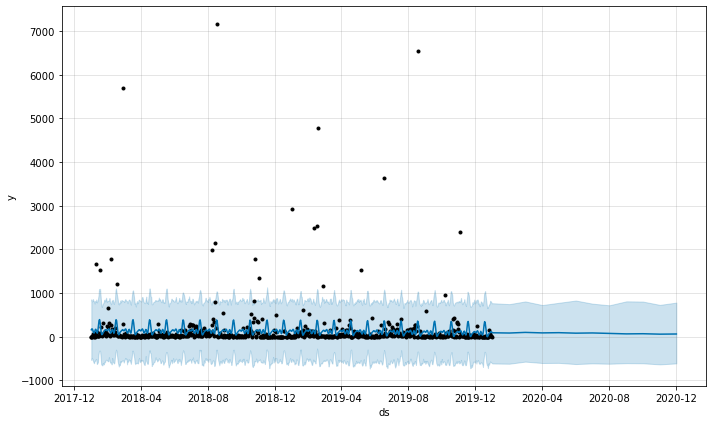

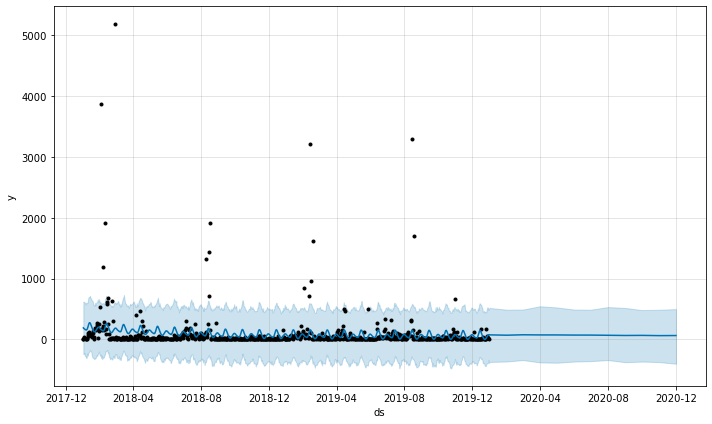

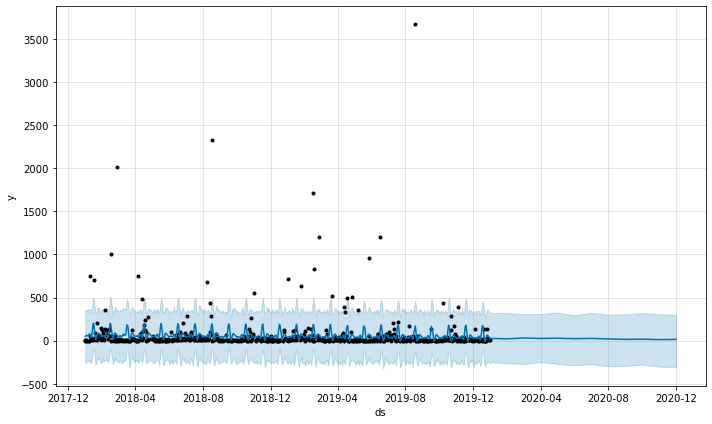

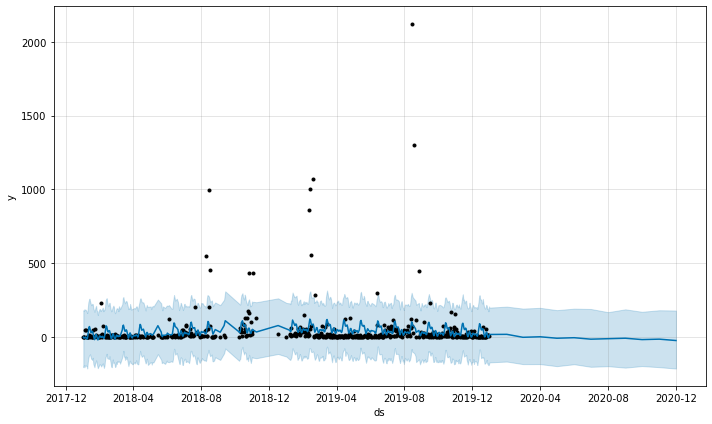

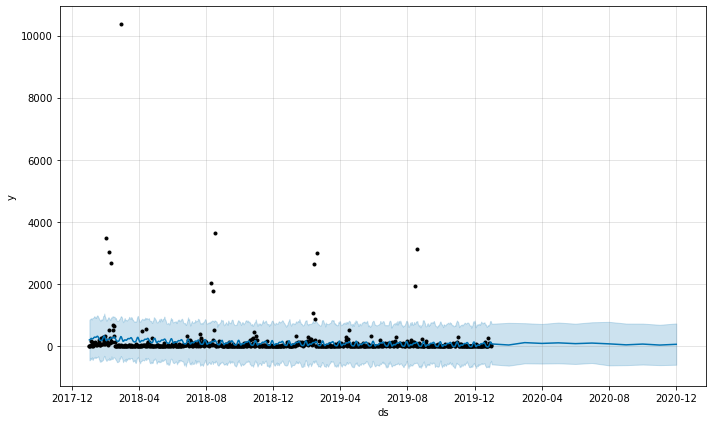

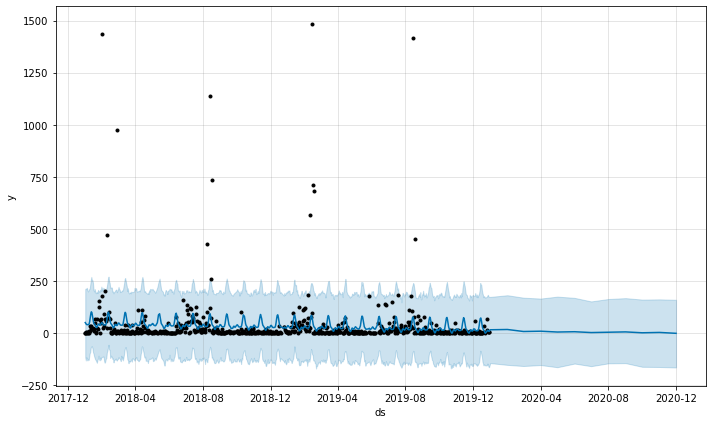

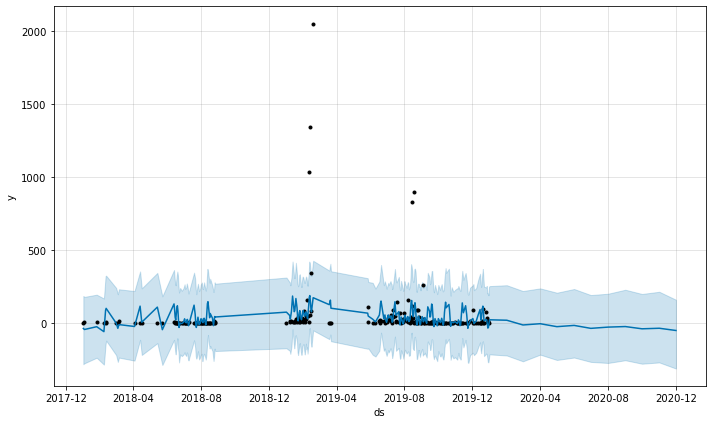

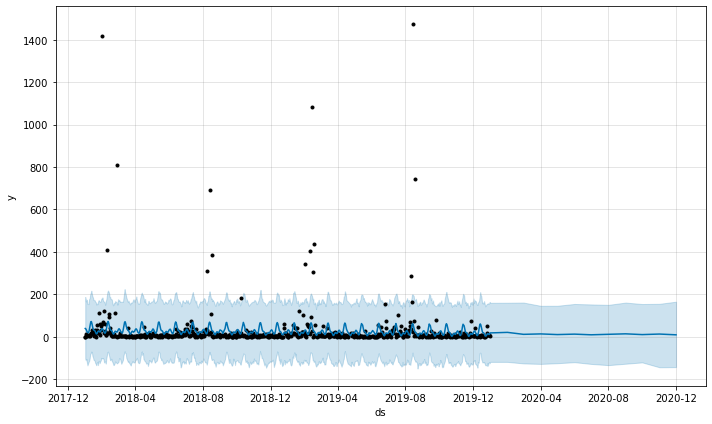

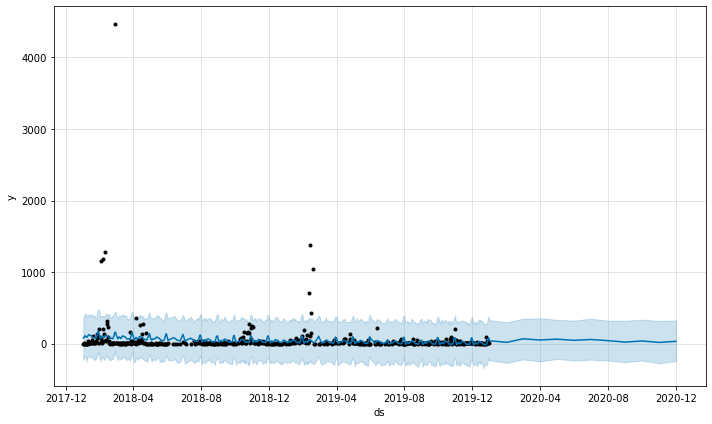

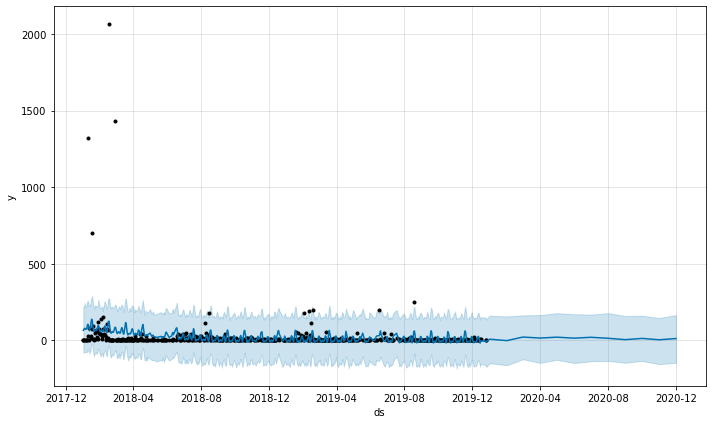

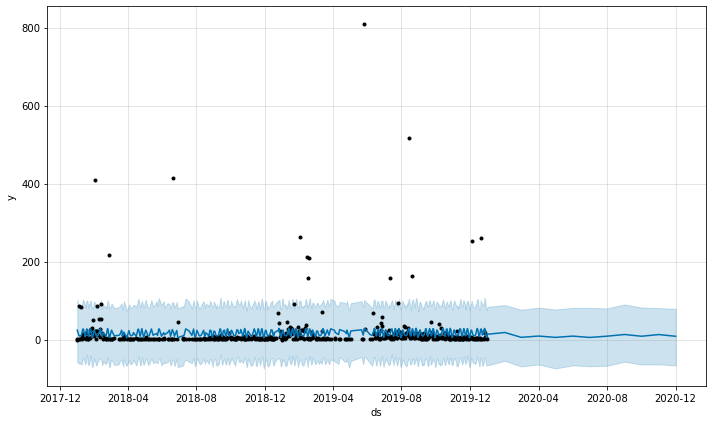

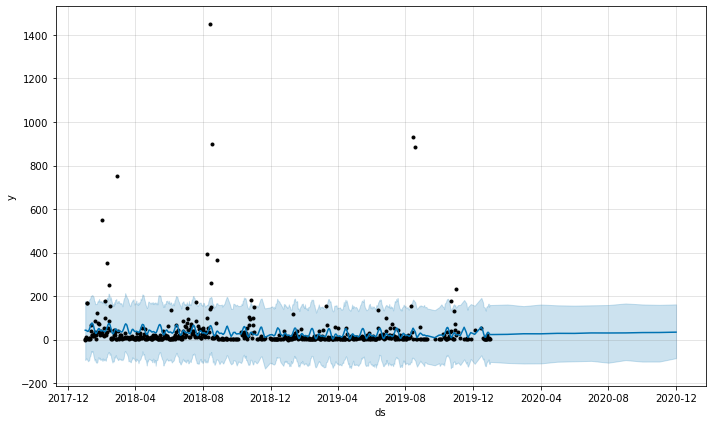

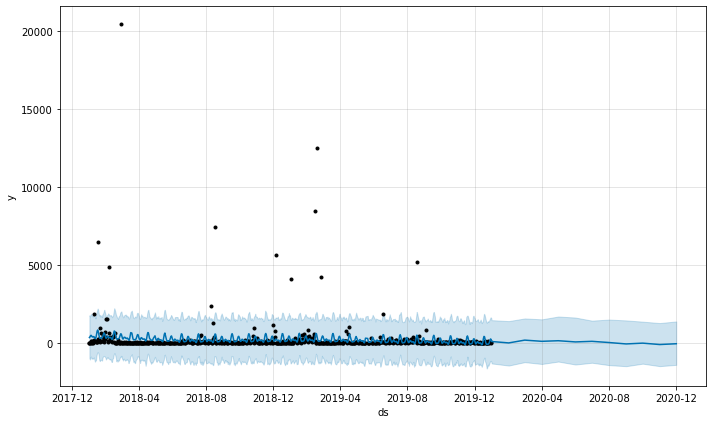

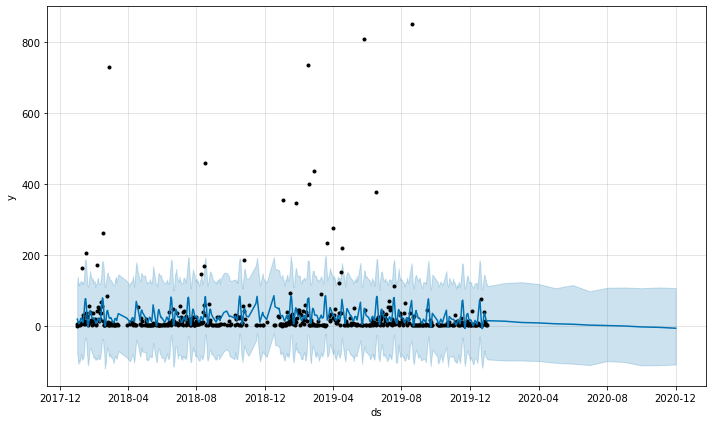

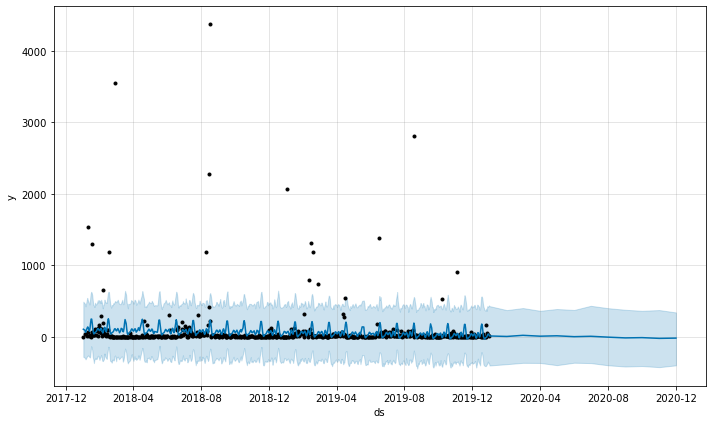

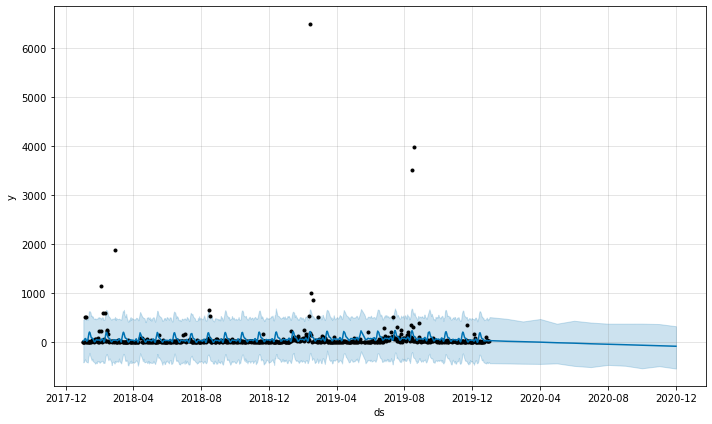

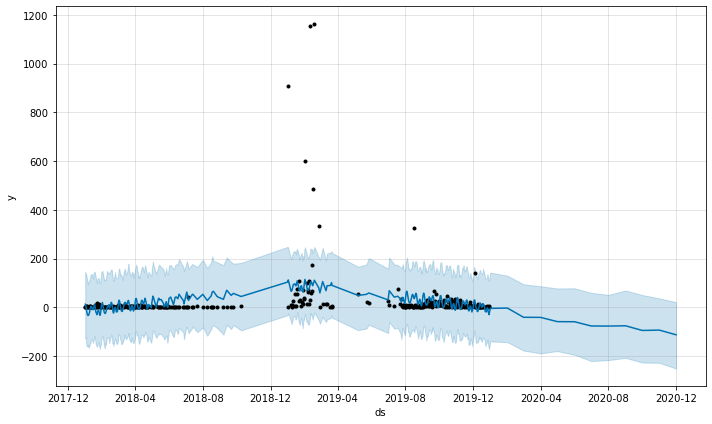

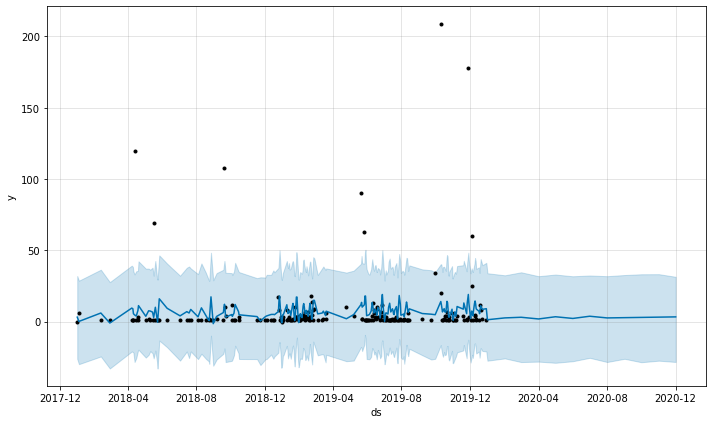

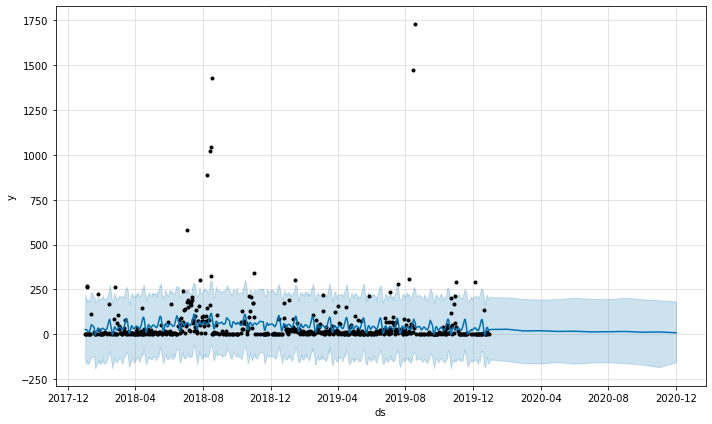

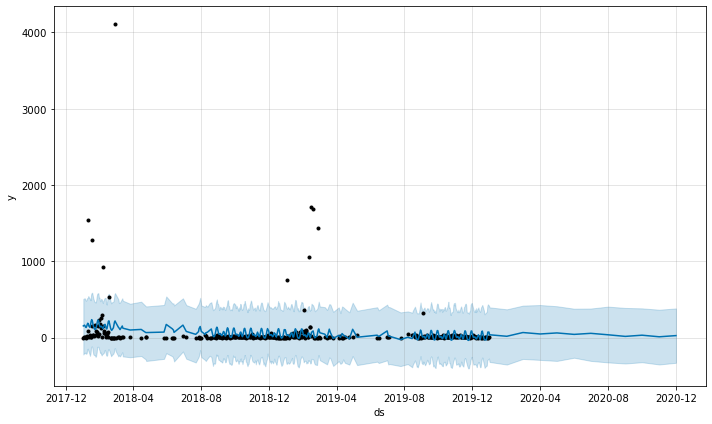

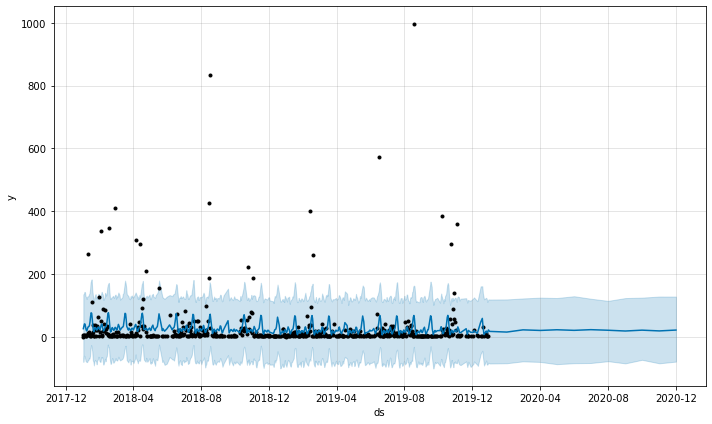

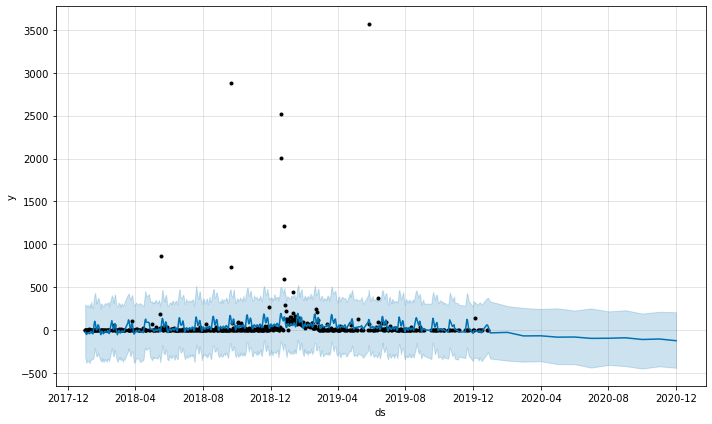

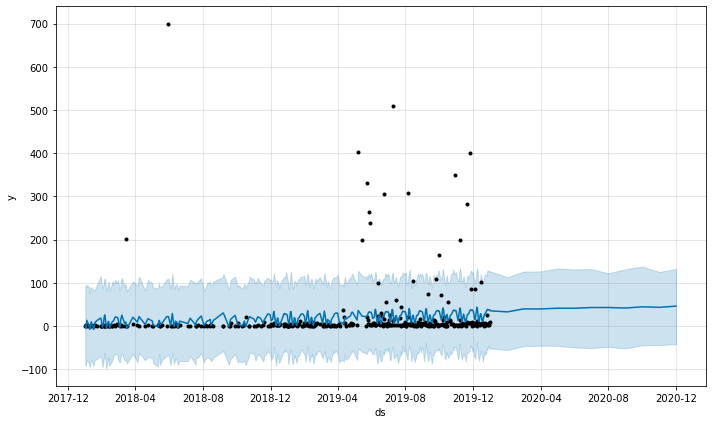

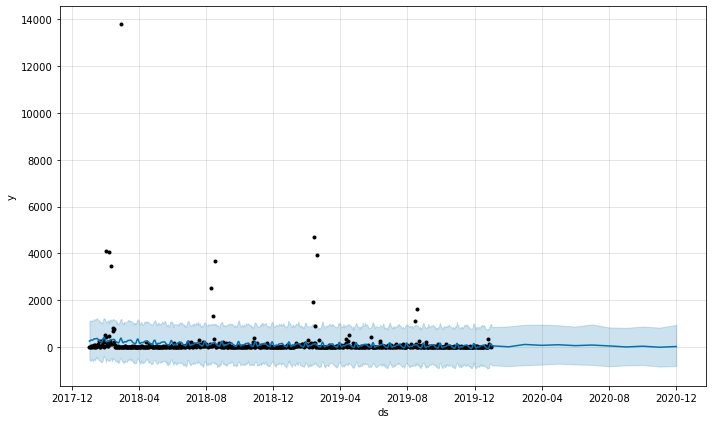

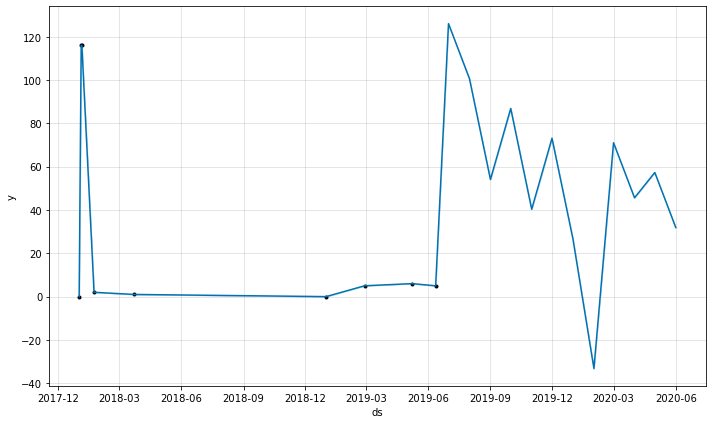

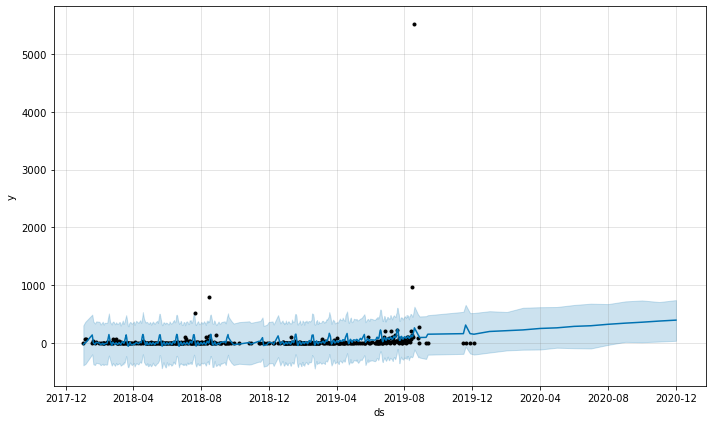

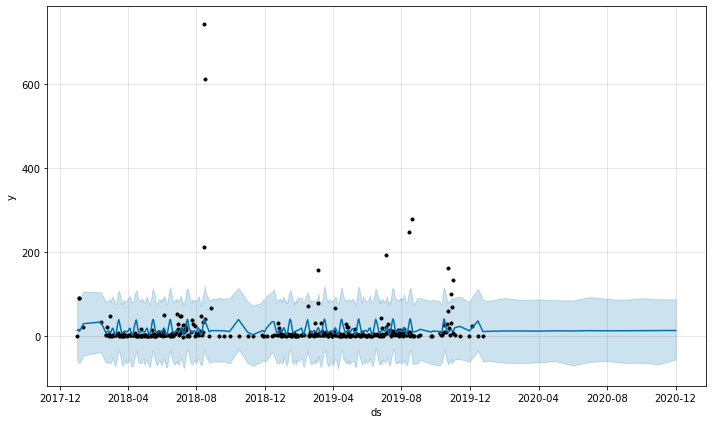

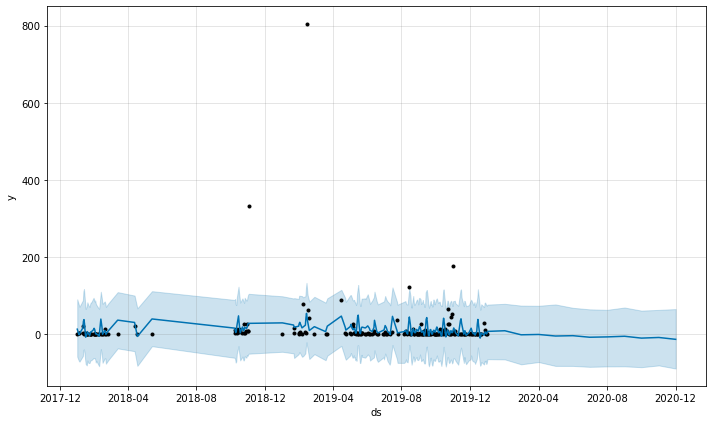

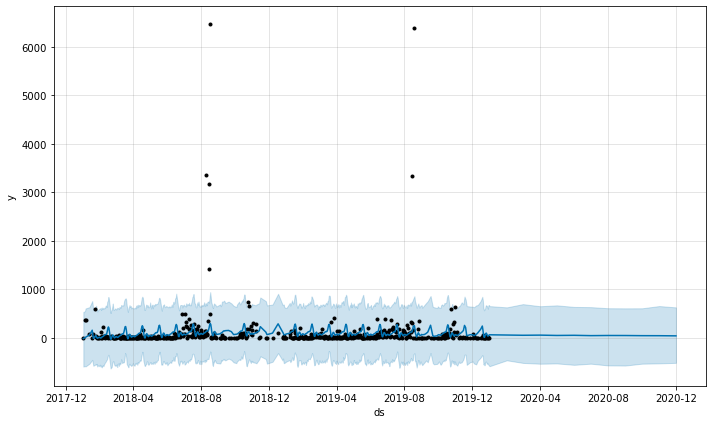

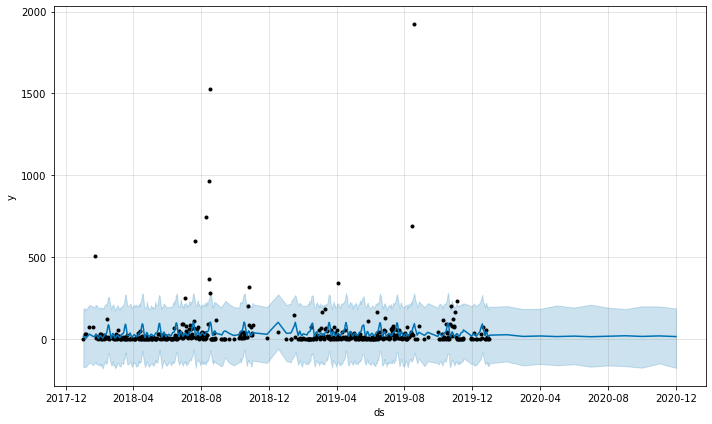

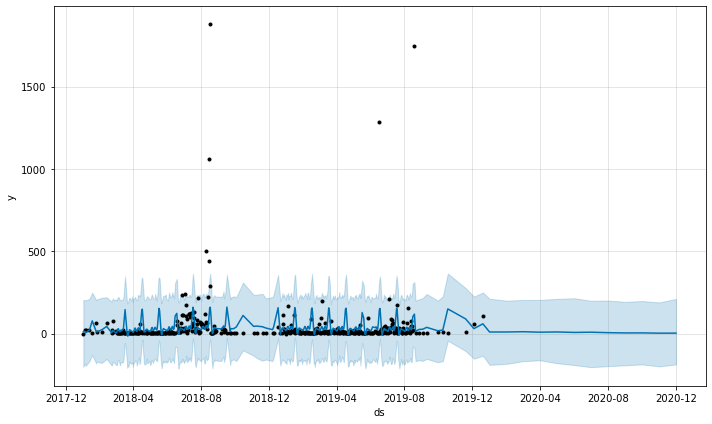

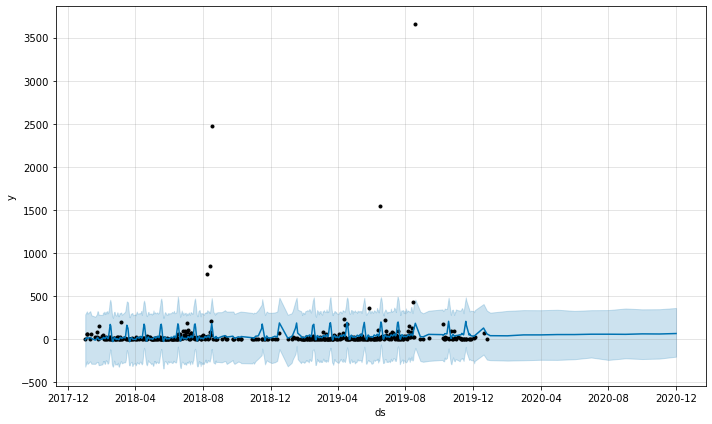

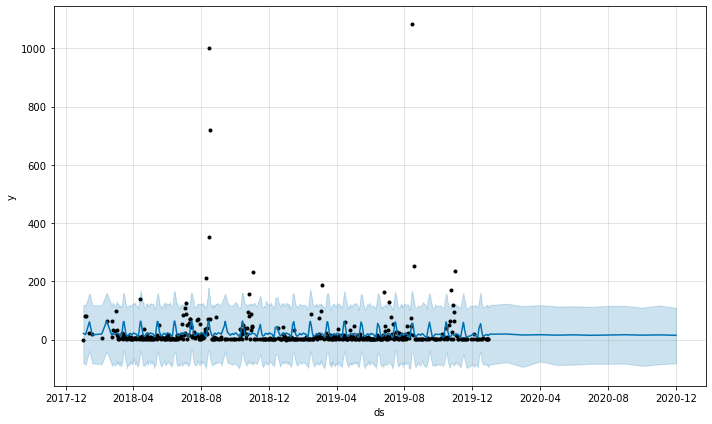

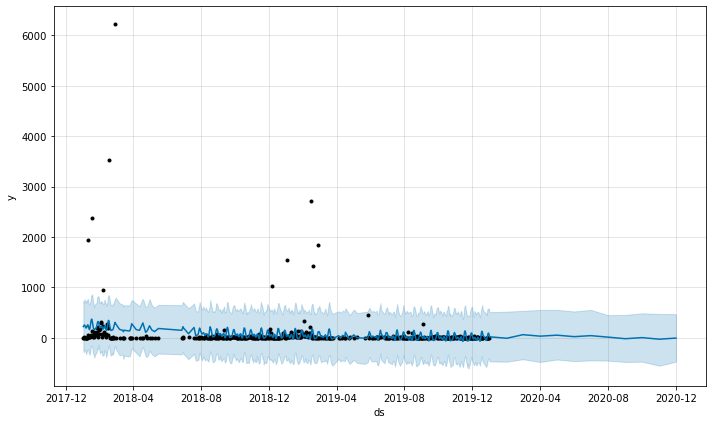

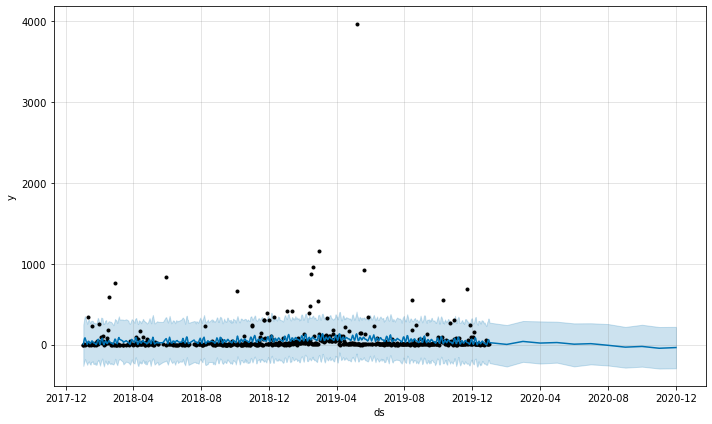

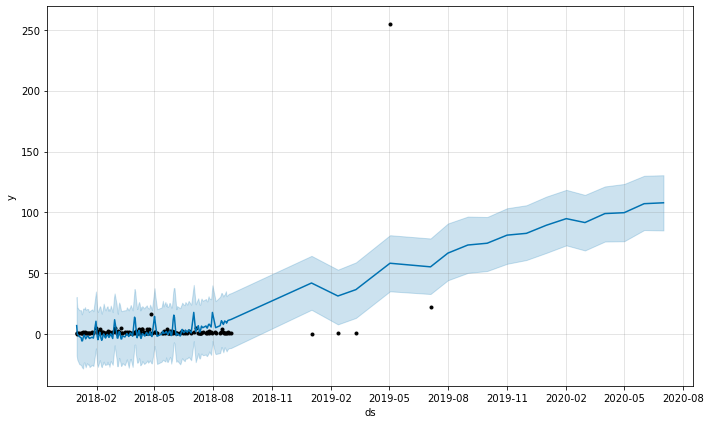

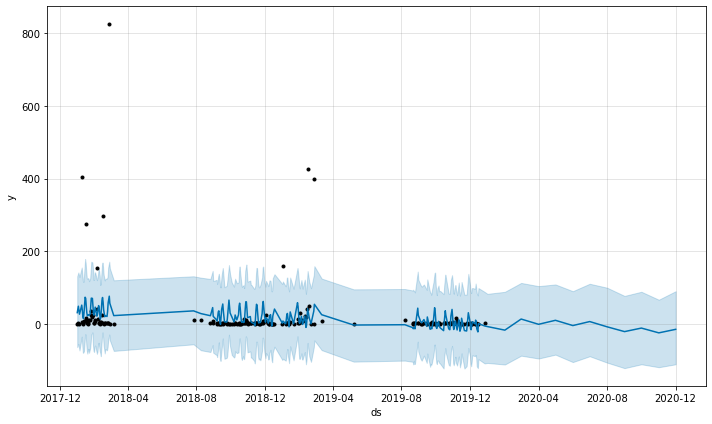

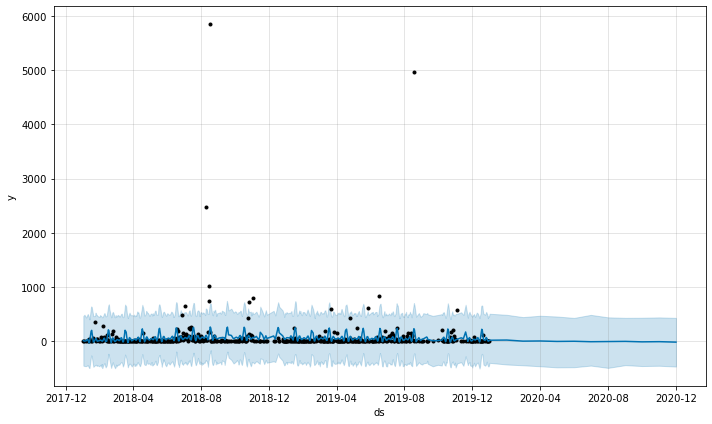

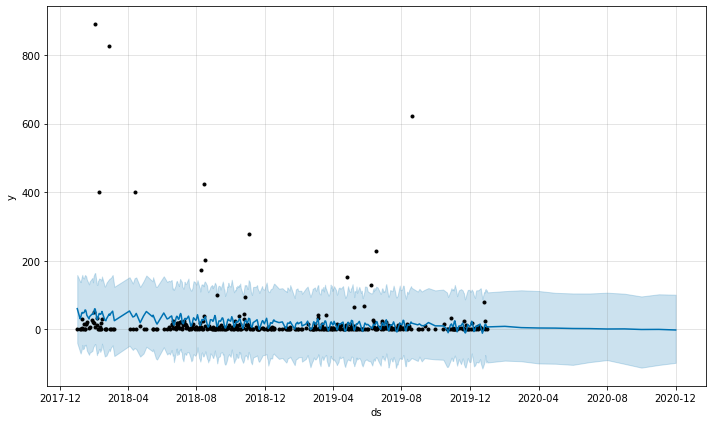

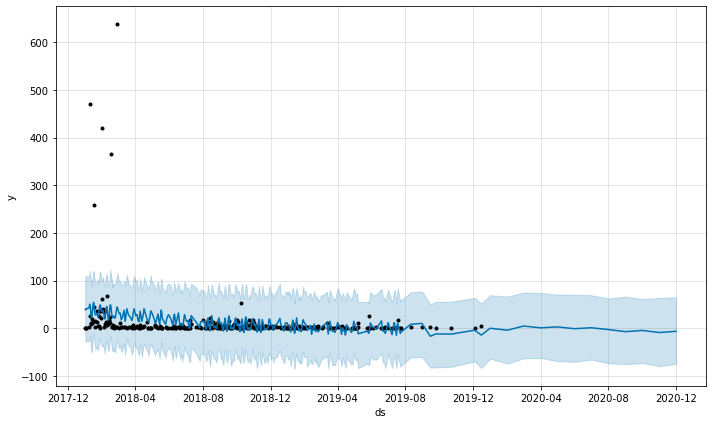

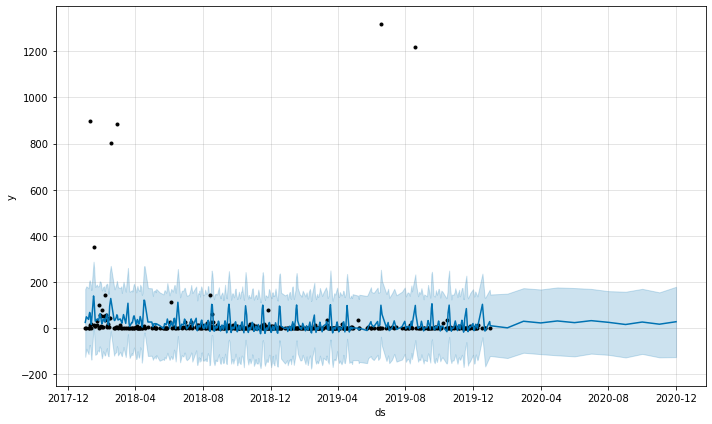

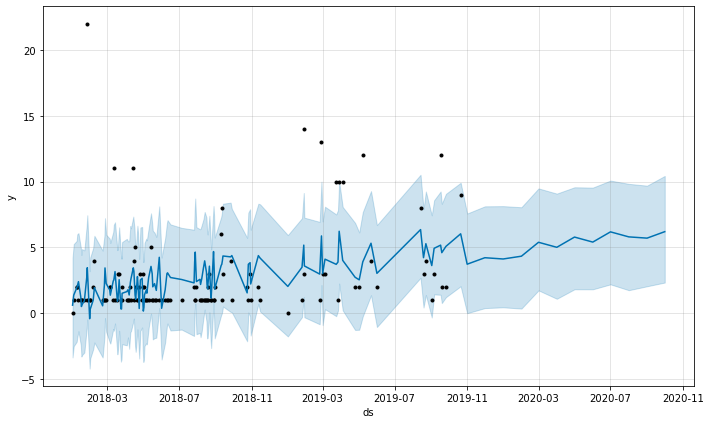

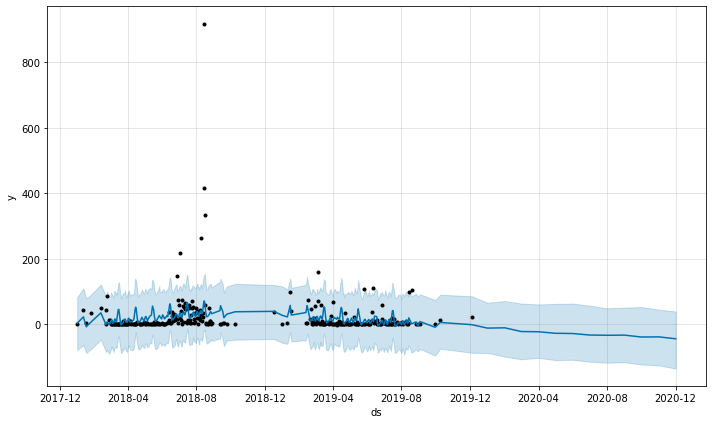

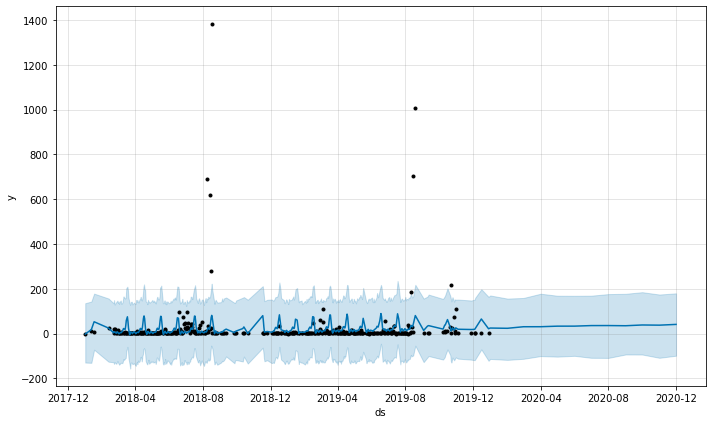

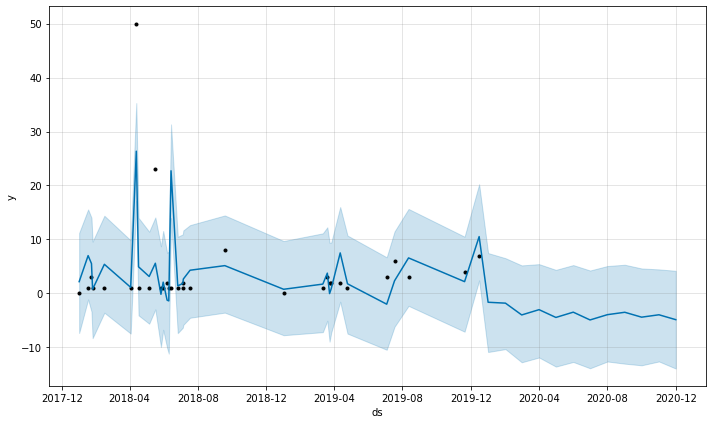

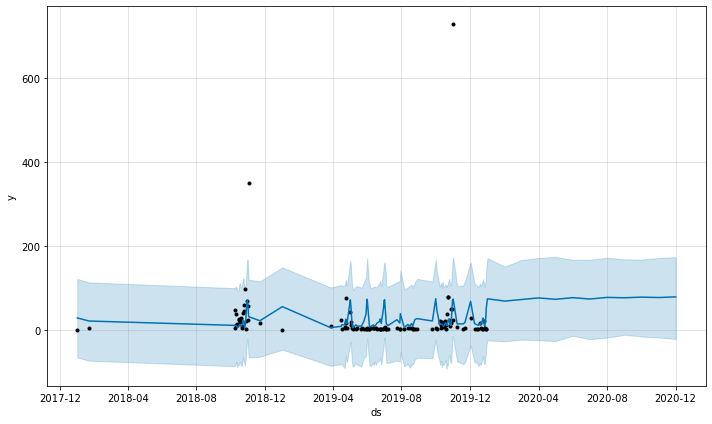

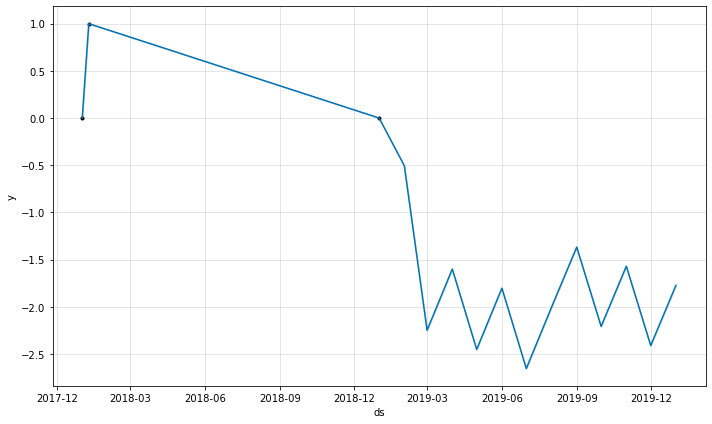

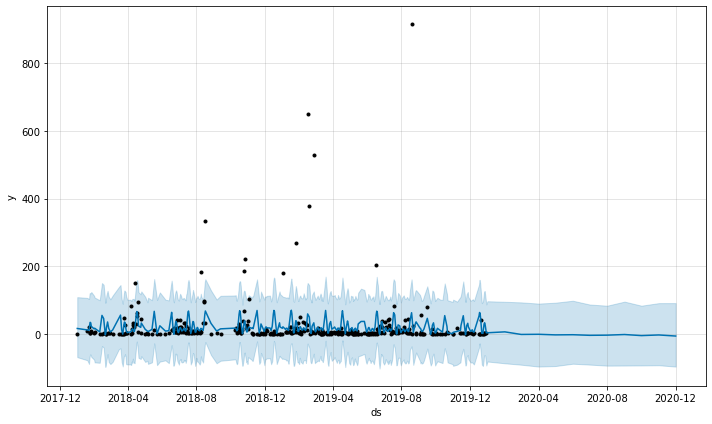

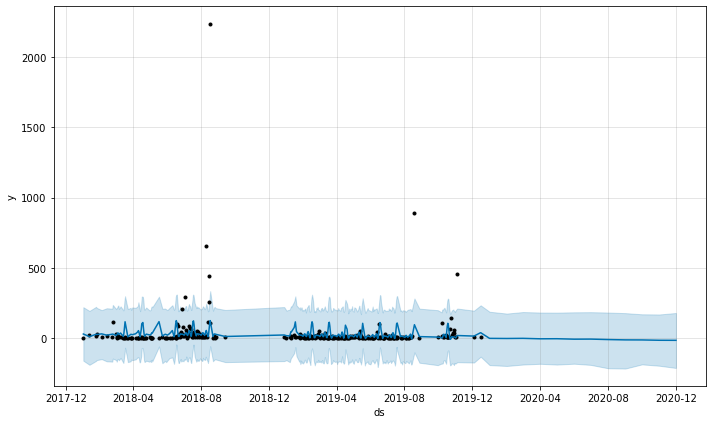

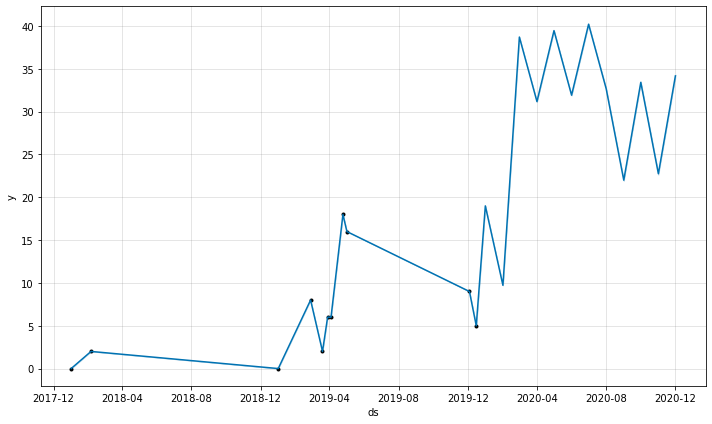

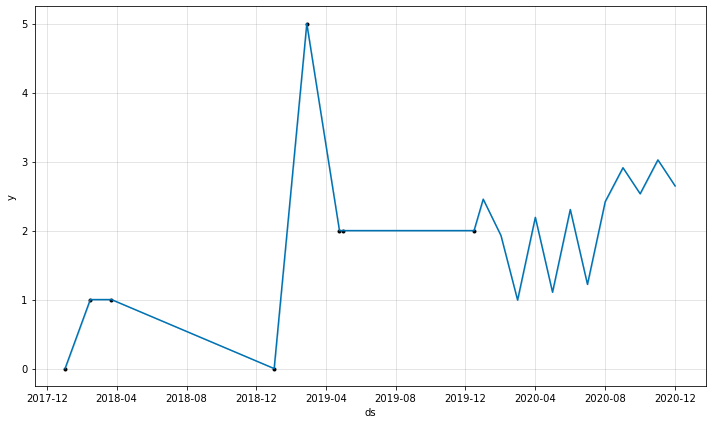

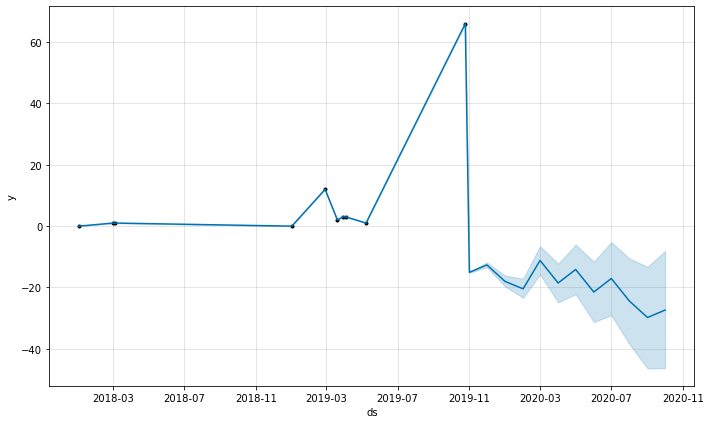

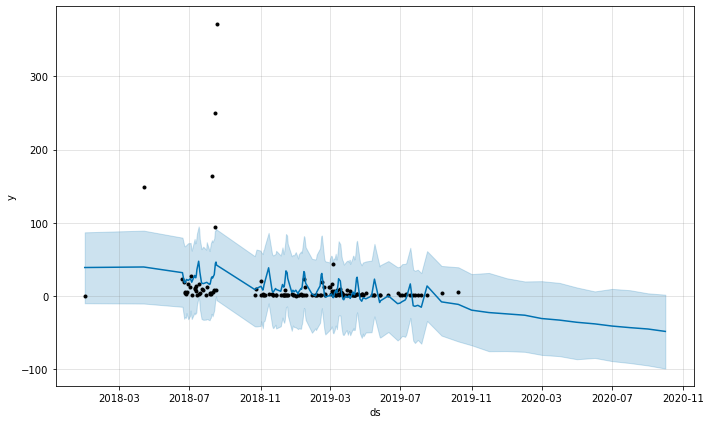

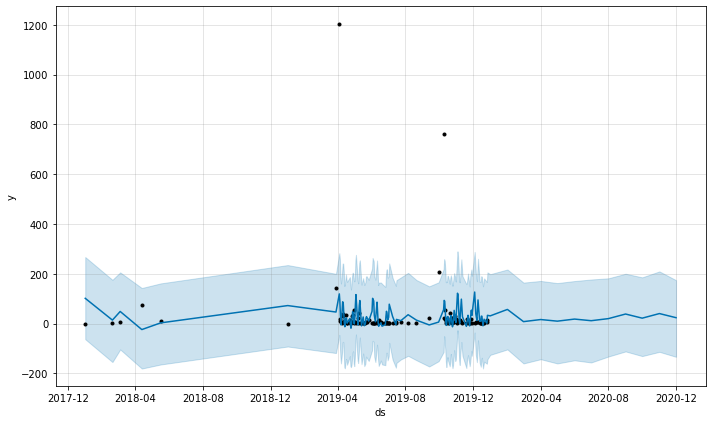

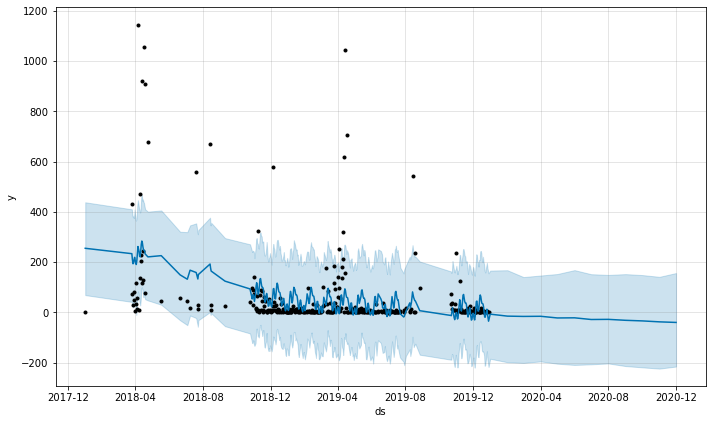

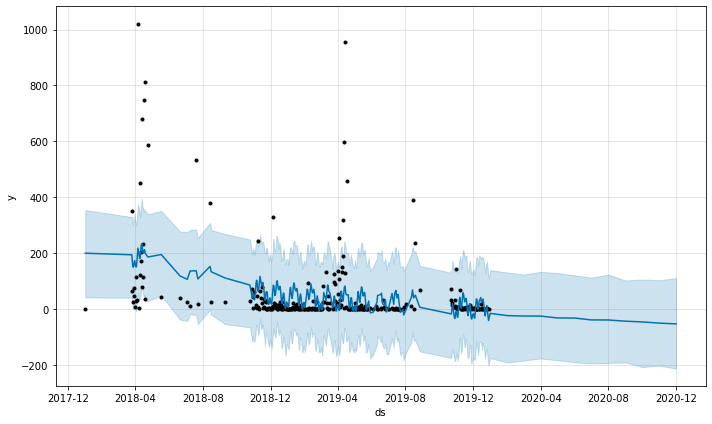

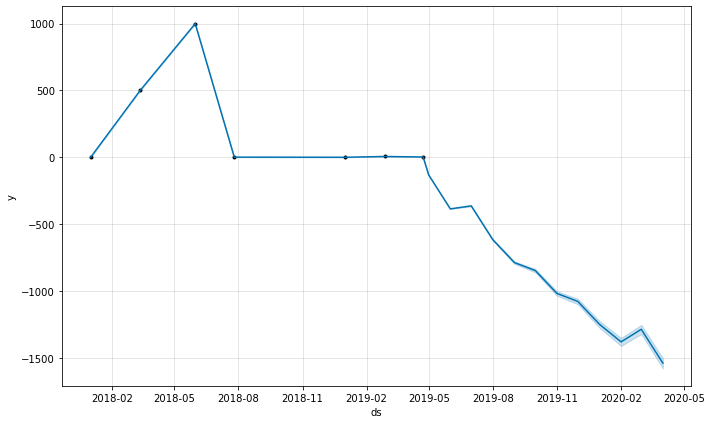

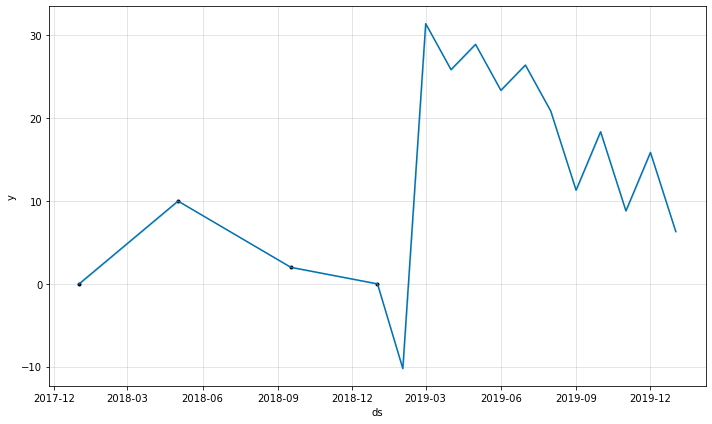

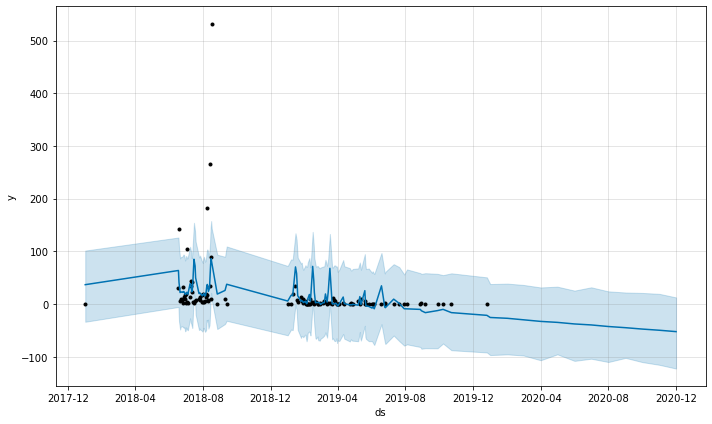

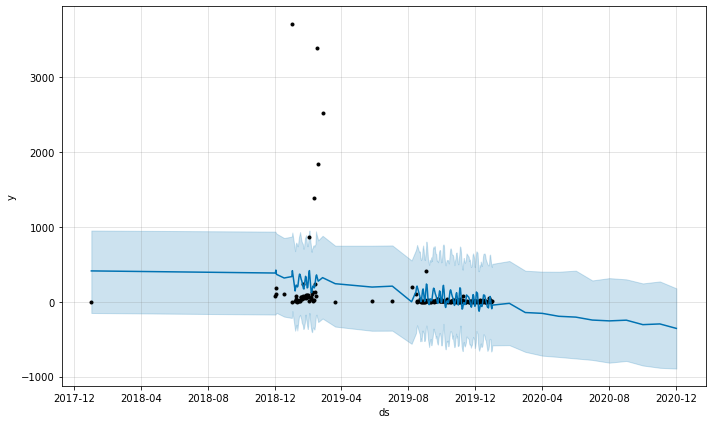

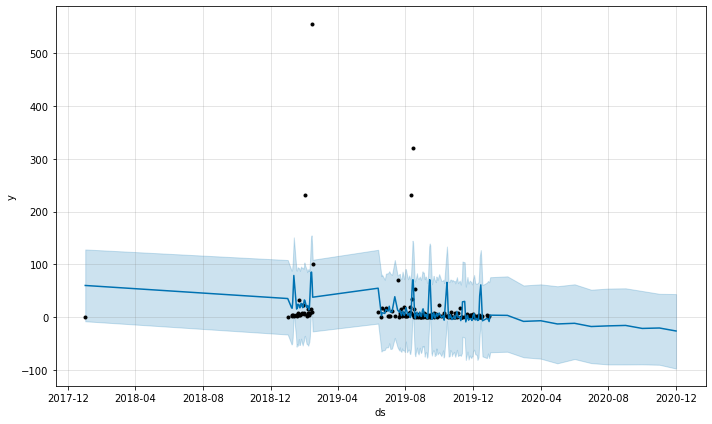

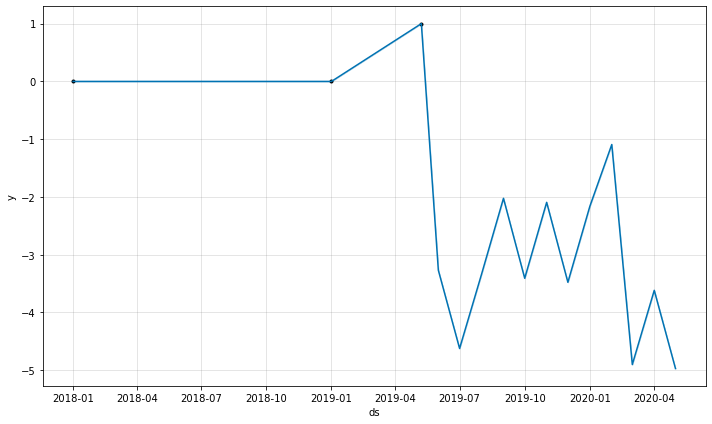

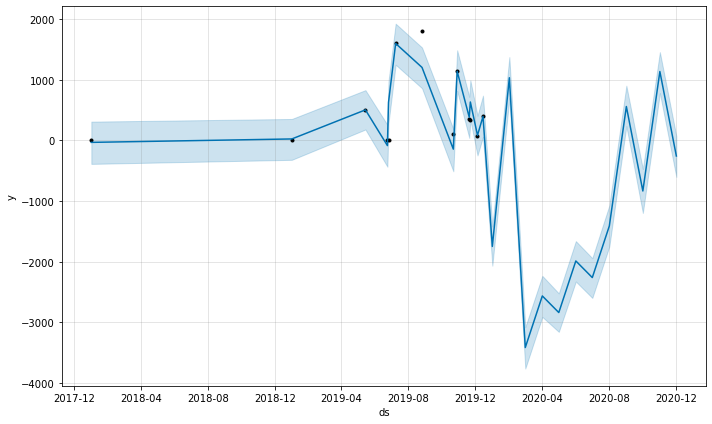

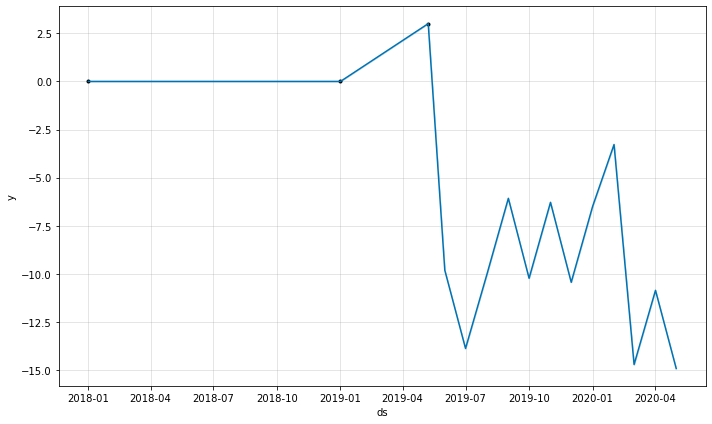

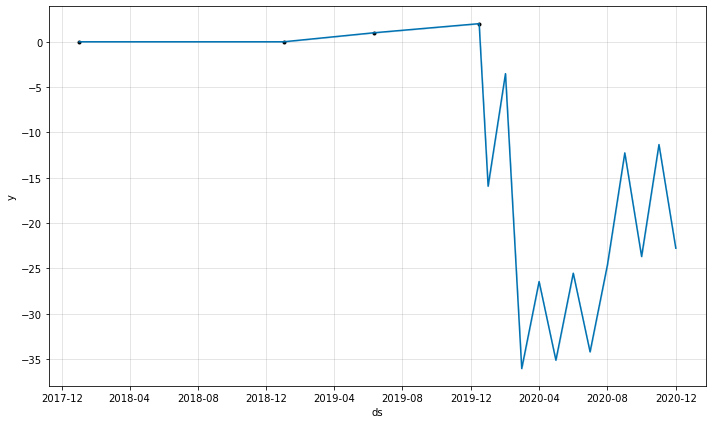

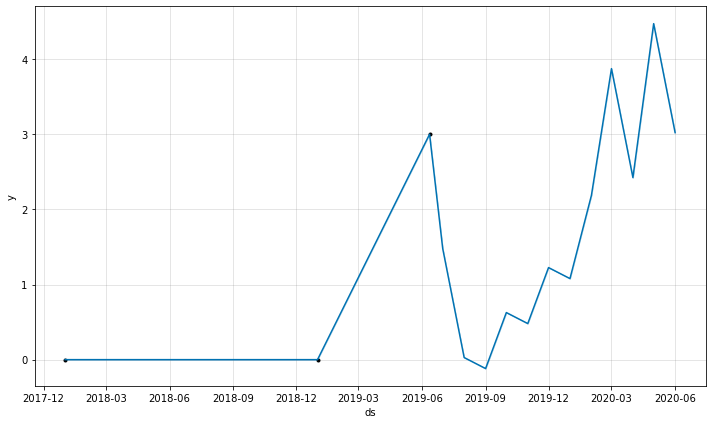

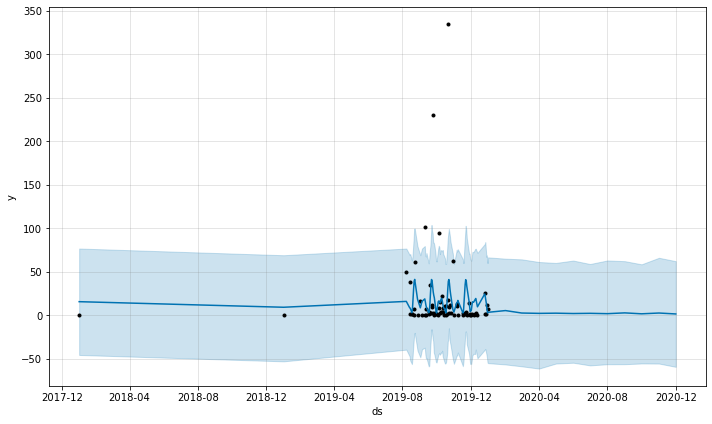

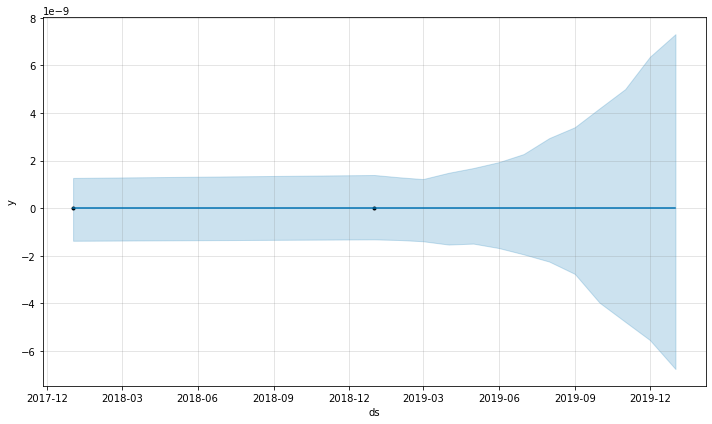

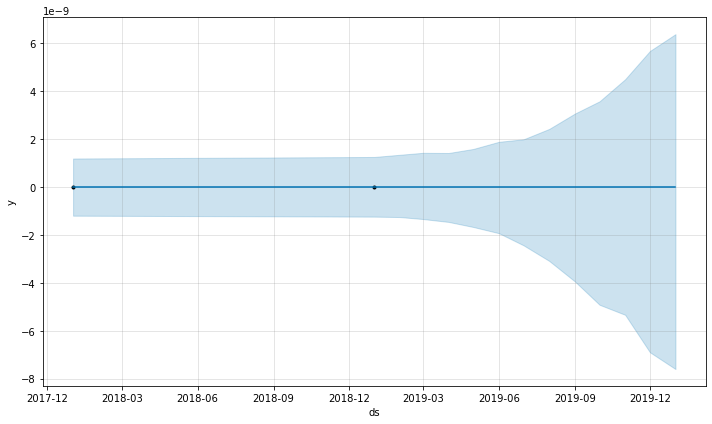

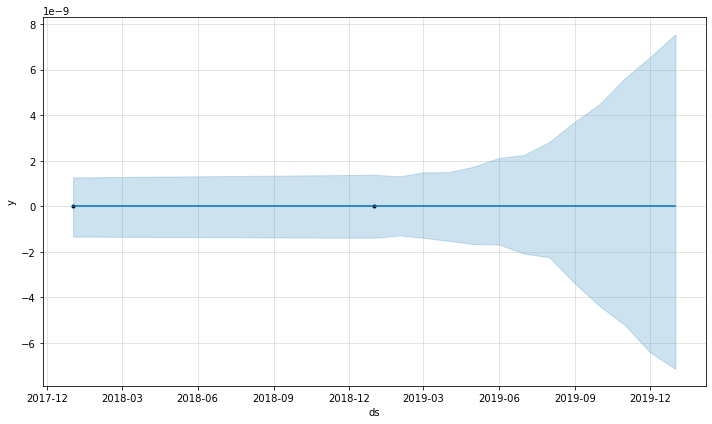

In [110]:
prediction_results_df = pd.DataFrame()

for index, row in article_dimension_df.iterrows():
    print(row[article_dimension])
    
    df_model = factOrder_df[factOrder_df[article_dimension] == row[article_dimension]]
    df_model = df_model.loc[:, ['DateOrderedKey', 'QuantityOrdered']]
    df_model = df_model.reset_index()
    df_model = df_model[['DateOrderedKey', 'QuantityOrdered']]
    df_model.columns = ['ds', 'y']
    #if df_model.shape[0] < 2:
    #    continue
    
    df_model = pd.concat([df_model, pd.DataFrame([{'ds' : pd.to_datetime(str(int(train_end_year) - 1) + '-01-01'), 'y' : 0}])])
    df_model = pd.concat([df_model, pd.DataFrame([{'ds' : pd.to_datetime(train_end_year + '-01-01'), 'y' : 0}])])
    
    train, test = CreateSplitTestAndTrainData(df_model)
           
    model = CreateModel(train)
    predictions = ModelPrediction(model)
    
    model_performance = pd.merge(test, predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-365:                                                                                                                                                                                                                                                         ], on='ds')
    
    model_performance[article_dimension] = row[article_dimension]
    
    prediction_results_df = pd.concat([prediction_results_df, model_performance]) 
    

In [111]:
model.component_modes

{'additive': ['monthly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [112]:
prediction_results_df

ds     y      yhat  yhat_lower  yhat_upper ArticleGenre
0  2020-04-01   1.0  1.732795  -75.640997   76.260910       Övrigt
1  2020-06-01  -1.0  0.990996  -75.335557   76.888281       Övrigt
2  2020-07-01   6.0 -1.914049  -73.236580   67.978038       Övrigt
3  2020-09-01 -24.0  2.216395  -70.001955   80.433562       Övrigt
4  2020-10-01 -28.0 -0.492603  -70.511815   82.109114       Övrigt
..        ...   ...       ...         ...         ...          ...
2  2020-05-01   2.0  2.522970  -55.413636   60.292933    Postcards
3  2020-06-01  27.0  2.133829  -54.458016   63.034532    Postcards
4  2020-09-01   3.0  2.862831  -56.139121   62.331267    Postcards
5  2020-10-01   7.0  1.798240  -55.308671   58.716370    Postcards
6  2020-12-01   5.0  1.630445  -59.185480   62.318791    Postcards

[526 rows x 6 columns]

In [113]:
prediction_results_df[12:36]

ds       y        yhat   yhat_lower   yhat_upper      ArticleGenre
6  2020-08-01     3.0  -40.725437  -430.009888   349.305091  DRESSES LS WOVEN
7  2020-09-01     3.0  -50.974881  -475.315845   313.966825  DRESSES LS WOVEN
8  2020-10-01     2.0  -53.627624  -431.656265   354.717706  DRESSES LS WOVEN
9  2020-11-01     1.0  -63.877067  -476.410035   312.998891  DRESSES LS WOVEN
10 2020-12-01     1.0  -66.529811  -438.288909   308.016939  DRESSES LS WOVEN
0  2020-01-01    56.0  266.502901 -1516.975599  2065.065234       SWEATSHIRTS
1  2020-02-01   214.0  193.463526 -1454.018759  1876.234742       SWEATSHIRTS
2  2020-03-01    19.0  359.532788 -1306.587005  2021.168111       SWEATSHIRTS
3  2020-04-01    34.0  311.556062 -1298.808493  2165.759916       SWEATSHIRTS
4  2020-05-01   238.0  349.465316 -1364.386286  2156.717581       SWEATSHIRTS
5  2020-06-01  1182.0  301.488590 -1529.566840  2018.817711       SWEATSHIRTS
6  2020-07-01    99.0  339.397844 -1316.588275  1956.802404       SWEATSHIRTS
7  2020-08-01   177.0  291.421118 -1472.433172  2045.671205       SWEATSHIRTS
8  2020-09-01    71.0  226.233013 -1497.867607  1992.728711       SWEATSHIRTS
9  2020-10-01    41.0  281.353646 -1554.900903  2032.320430       SWEATSHIRTS
10 2020-11-01    27.0  216.165541 -1639.135910  1947.540612       SWEATSHIRTS
11 2020-12-01    65.0  271.286174 -1497.987531  1955.964408       SWEATSHIRTS
0  2020-01-01    71.0  155.579942 -1353.803293  1611.007115           TEES LS
1  2020-02-01   179.0   99.279362 -1391.182331  1540.648097           TEES LS
2  2020-03-01    10.0  230.196877 -1274.494569  1660.124406           TEES LS
3  2020-04-01    93.0  178.405847 -1306.613486  1670.939708           TEES LS
4  2020-05-01   141.0  212.332435 -1118.950192  1840.985923           TEES LS
5  2020-06-01   543.0  160.541406 -1177.787799  1647.005887           TEES LS
6  2020-07-01     8.0  194.467994 -1341.889116  1680.916480           TEES LS

In [114]:
#factOrder_df[factOrder_df['ArticleGenre'] == 'BATH']
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [115]:
# Check MAE value
model_performance_MAE = mean_absolute_error(prediction_results_df['y'], prediction_results_df['yhat'])
print(f'The MAE for the seasonality model is {model_performance_MAE}')

# Check MAPE value
model_performance_MAPE = mean_absolute_percentage_error(prediction_results_df['y'], prediction_results_df['yhat'])
print(f'The MAPE for the seasonality model is {model_performance_MAPE}')

The MAE for the seasonality model is 57.7464149308626
The MAPE for the seasonality model is 9.081173959648153


In [116]:
#prediction_results_df.to_csv('prediction_results_df.csv', index=False)